# Serão realizados vários procedimentos de estimação de dados faltantes levando em conta a natureza do dado faltante e em seguida será realizado uma previsão de um tipo de alga marinha pelo algoritmo de Árvore de Regressão.

In [64]:
require(rpart)
require(rpart.plot)
require(DMwR)
require("TeachingSampling")
require(ggplot2)
require(nortest)
require(e1071)
require(mice)

In [65]:
data(algae)

In [66]:
#Observações com muitas variáveis faltantes, como são apenas 2 observações retirei dos dados.
algae[c(62,199),] 
dados=algae[-c(62,199),]

,season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
62,summer,small,medium,6.4,NA,NA,NA,NA,NA,14,NA,19.4,0.0,0.0,2,0,3.9,1.7
199,winter,large,medium,8.0,7.6,NA,NA,NA,NA,NA,NA,0.0,12.5,3.7,1,0,0.0,4.9


In [67]:
head(dados)

season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
winter,small,medium,8.00,9.8,60.800,6.238,578.000,105.000,170.000,50.0,0.0,0.0,0.0,0.0,34.2,8.3,0.0
spring,small,medium,8.35,8.0,57.750,1.288,370.000,428.750,558.750,1.3,1.4,7.6,4.8,1.9,6.7,0.0,2.1
autumn,small,medium,8.10,11.4,40.020,5.330,346.667,125.667,187.057,15.6,3.3,53.6,1.9,0.0,0.0,0.0,9.7
spring,small,medium,8.07,4.8,77.364,2.302,98.182,61.182,138.700,1.4,3.1,41.0,18.9,0.0,1.4,0.0,1.4
autumn,small,medium,8.06,9.0,55.350,10.416,233.700,58.222,97.580,10.5,9.2,2.9,7.5,0.0,7.5,4.1,1.0
winter,small,high,8.25,13.1,65.750,9.248,430.000,18.250,56.667,28.4,15.1,14.6,1.4,0.0,22.5,12.6,2.9


In [68]:
#Proporção de dados faltantes
nrow(dados[!complete.cases(dados),])/nrow(dados)

[1] 0.07070707

# Função que põem os nomes das linhas certas

In [69]:
AjeitaDados=function(y){
y=algae[-c(62,199),]
x=apply(y,1,function(x) sum(is.na(x)));x
x=data.frame(x)
acocha=as.numeric(rownames(x));acocha
length(acocha)
acocha[62:197]=acocha[62:197]-1
acocha[198]=acocha[198]-2
acocha
rownames(x)=as.character(acocha);rownames(x)
x=cbind(rownames(x),x);x
rownames(y)=as.character(x[,1])
return(y)
}

In [70]:
dados=AjeitaDados(dados)

In [71]:
##Valores faltantes nas linhas
x=apply(dados,1,function(x) sum(is.na(x)))
x[x!=0]

28  38  48  55  56  57  58  59  60  61  62 115 160 183 
  1   1   1   2   2   2   2   2   2   2   1   1   1   1

In [72]:
##Valores faltantes nas colunas
apply(dados,2,function(x) sum(is.na(x)))

season   size  speed   mxPH   mnO2     Cl    NO3    NH4   oPO4    PO4   Chla 
     0      0      0      1      1      8      0      0      0      1     10 
    a1     a2     a3     a4     a5     a6     a7 
     0      0      0      0      0      0      0

# Pré-Processamento de Dados e Avaliação de modelos por Àrvore de Regressão com alguns métodos de estimação de dados faltantes.

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

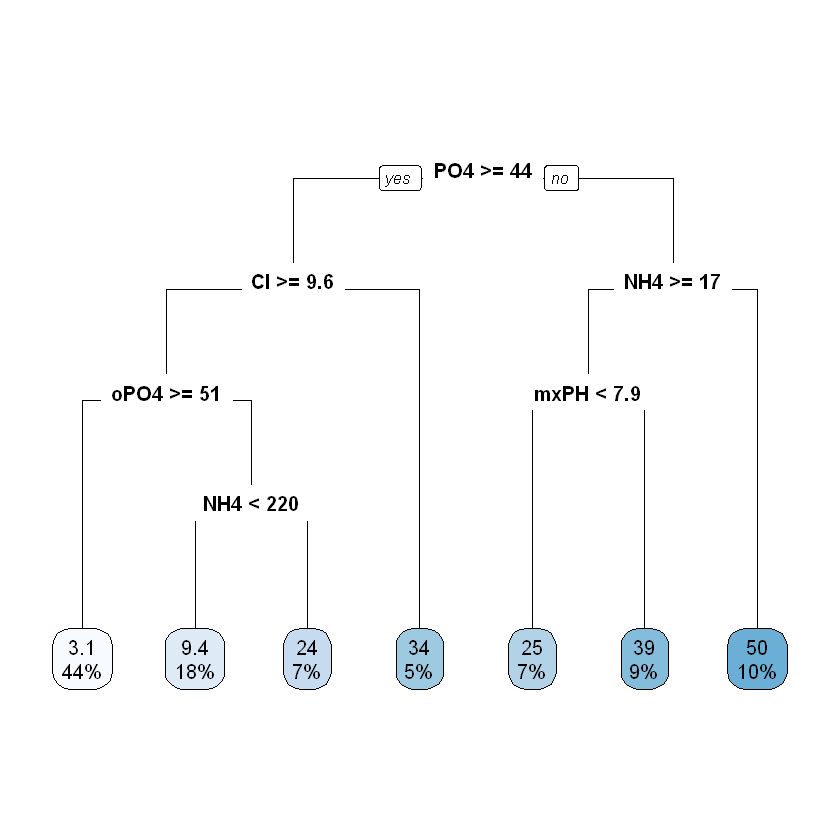

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

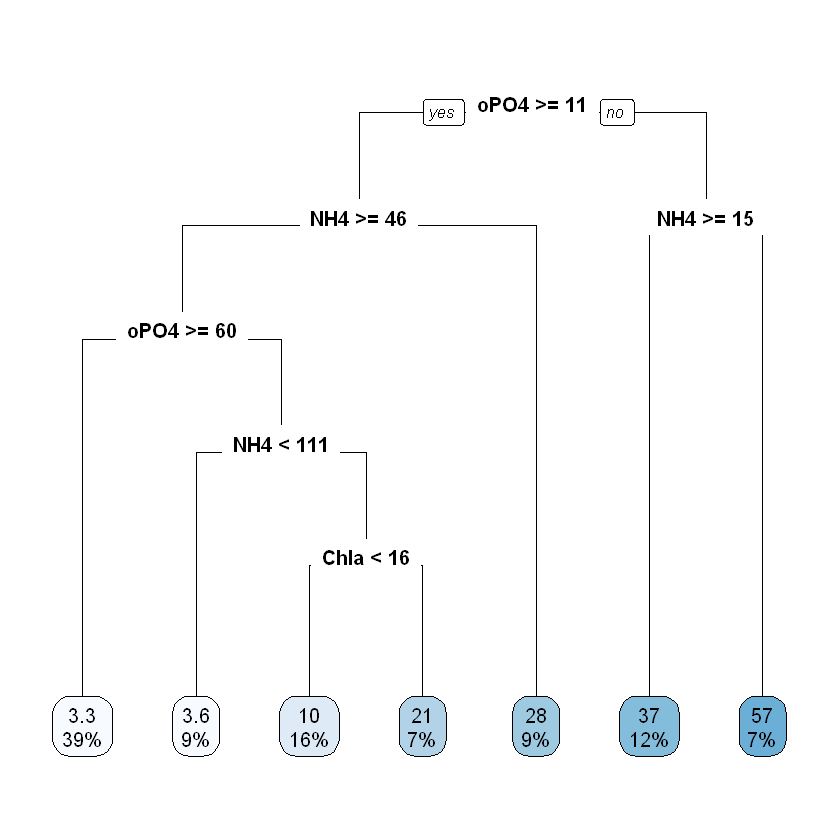

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

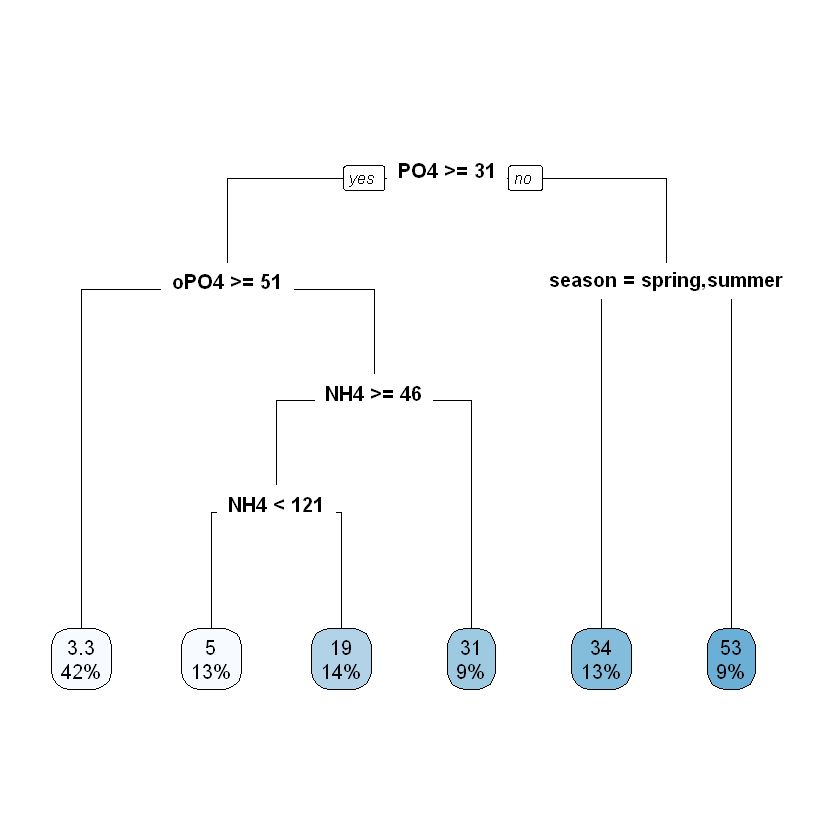

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

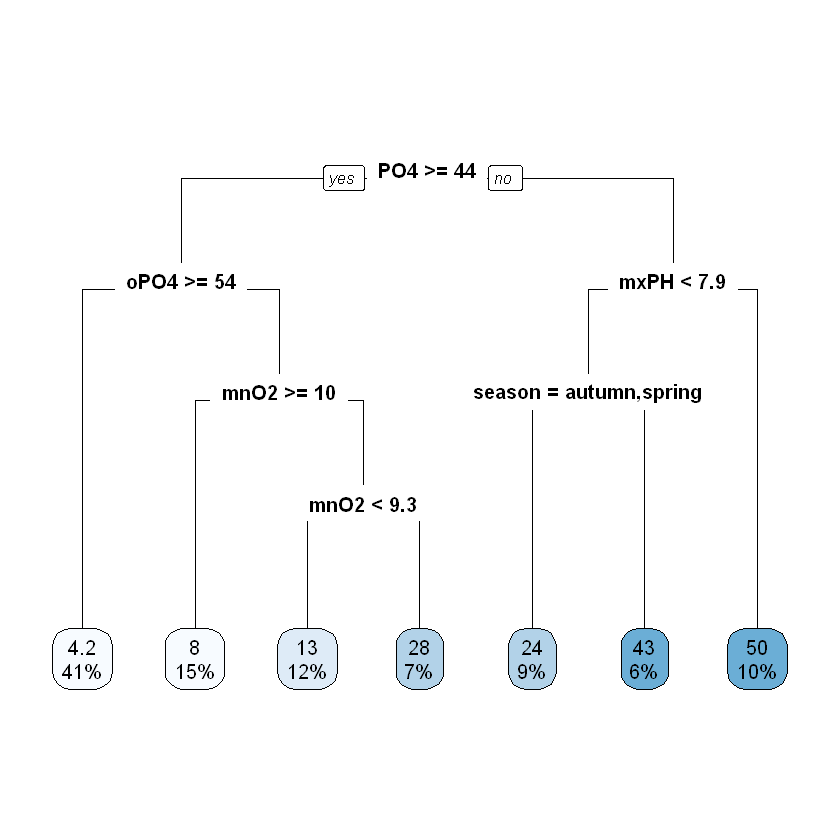

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

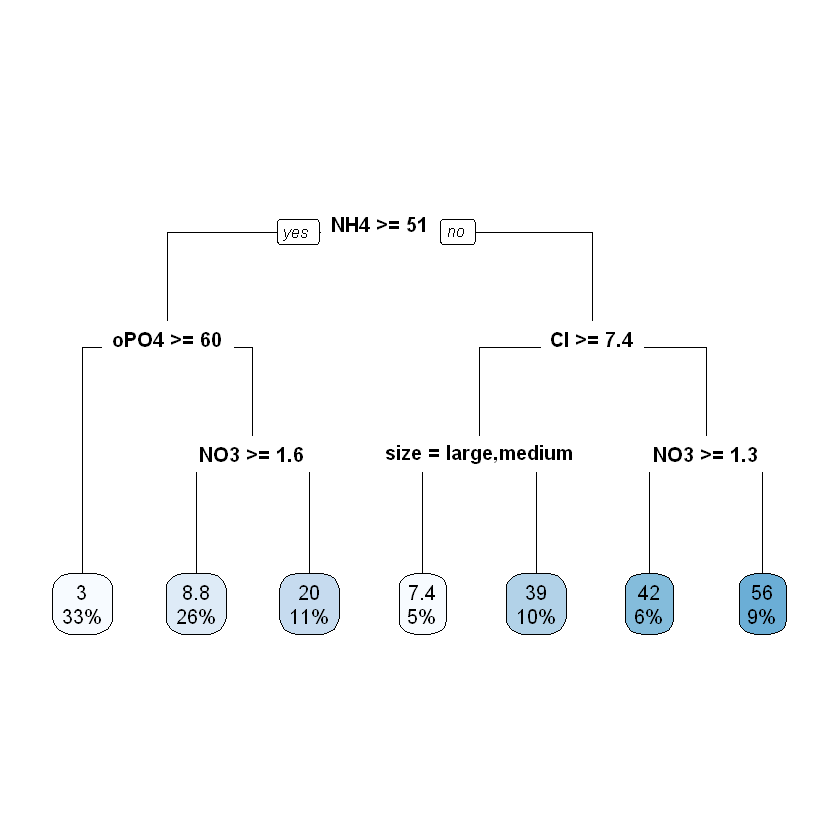

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

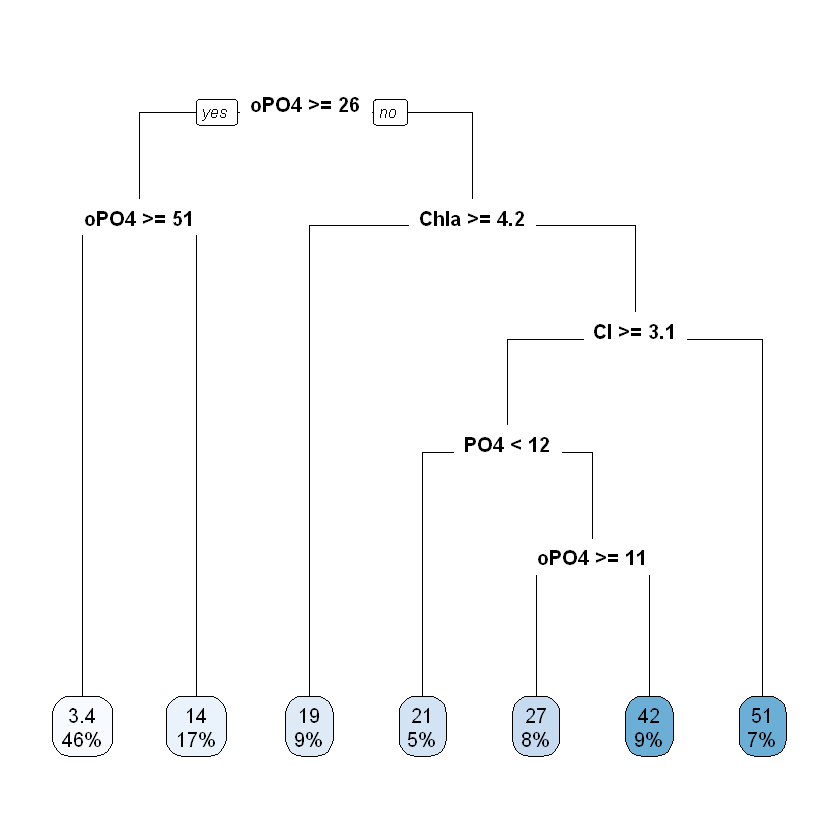

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

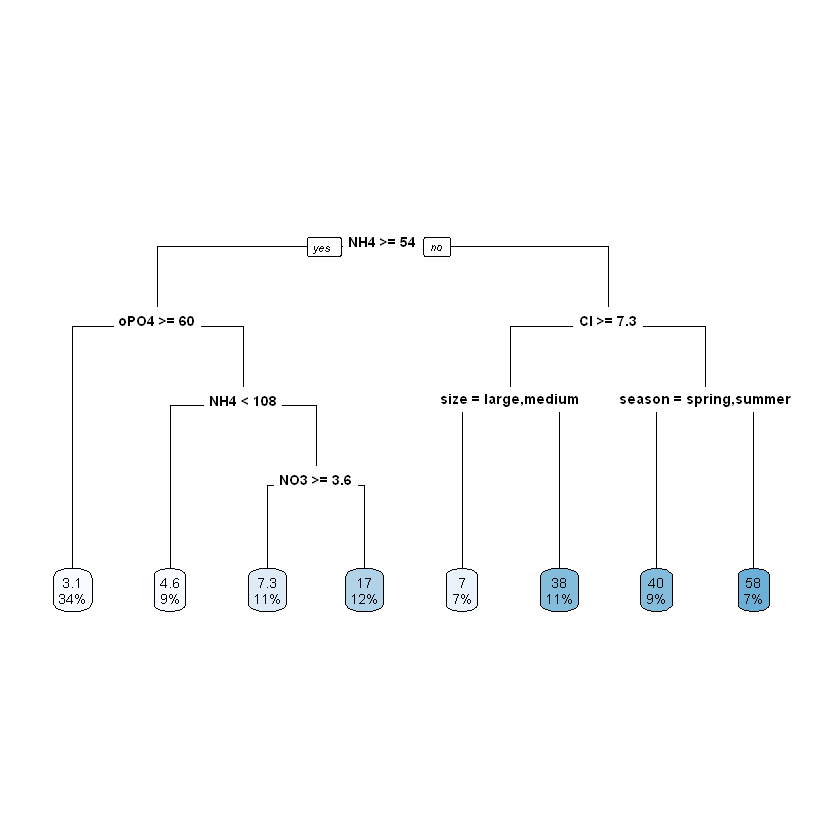

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

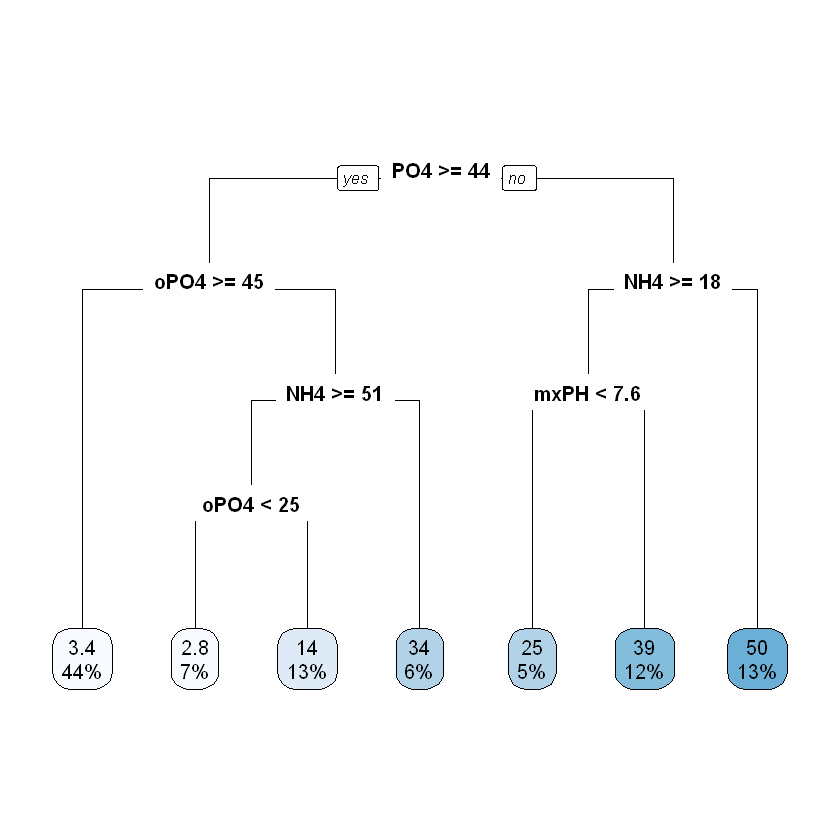

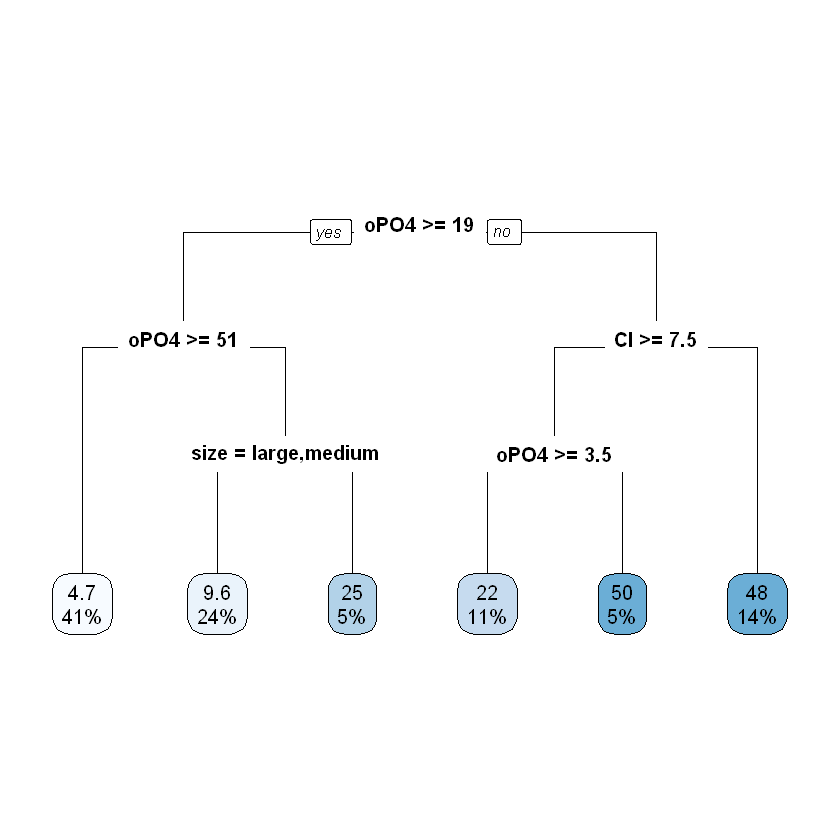

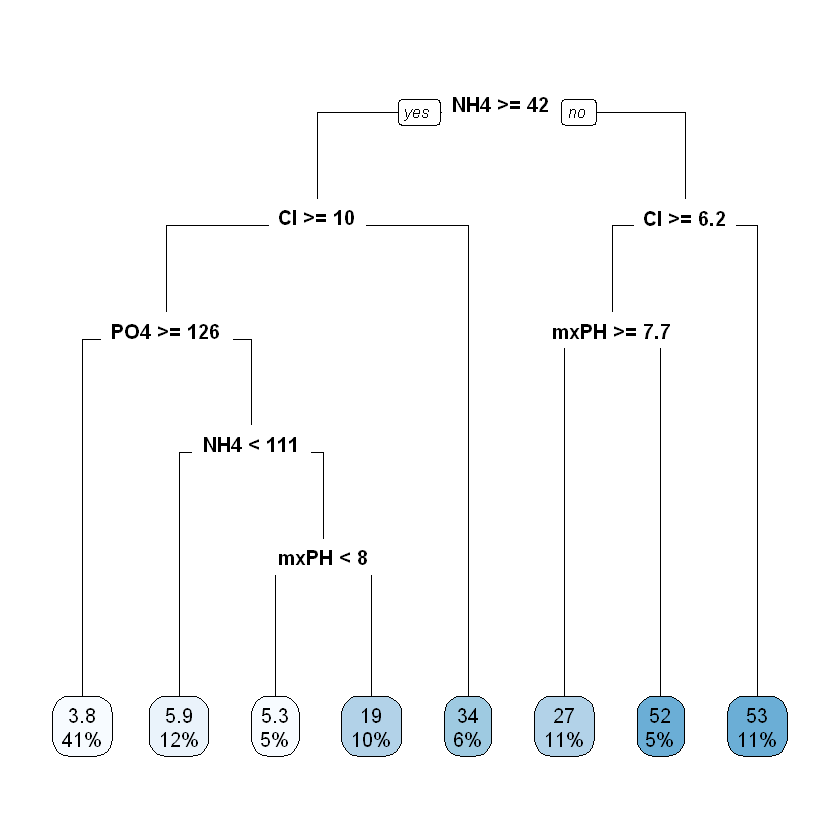

In [73]:
#Estimando os valores faltantes pelo método do pacote rpart
metricas=c()
set.seed(7)
for(i in 1:10){
amostra=S.SI(nrow(dados),floor(nrow(dados)*0.7))
treino=dados[amostra,]
teste=dados[-amostra,]
modelo1=rpart(a1 ~ ., data = treino[, 1:12])
rpart.plot(modelo1, type=0, varlen=10)
##Avaliação da performance do modelo
metricas=append(metricas,mean((teste$a1-predict(modelo1,teste[,1:11]))^2))
}

In [74]:
metricas
m1=cbind(mean(metricas),sd(metricas))

[1] 316.4394 333.2860 368.3826 305.5904 365.7641 431.5032 304.5683 198.5681
 [9] 301.0751 356.9849

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

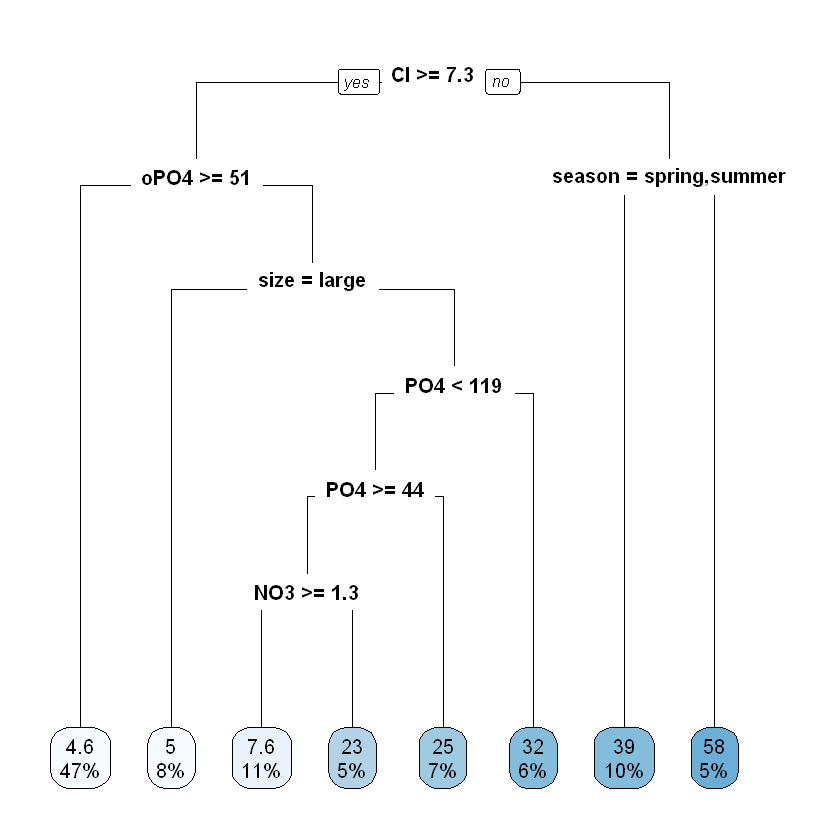

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

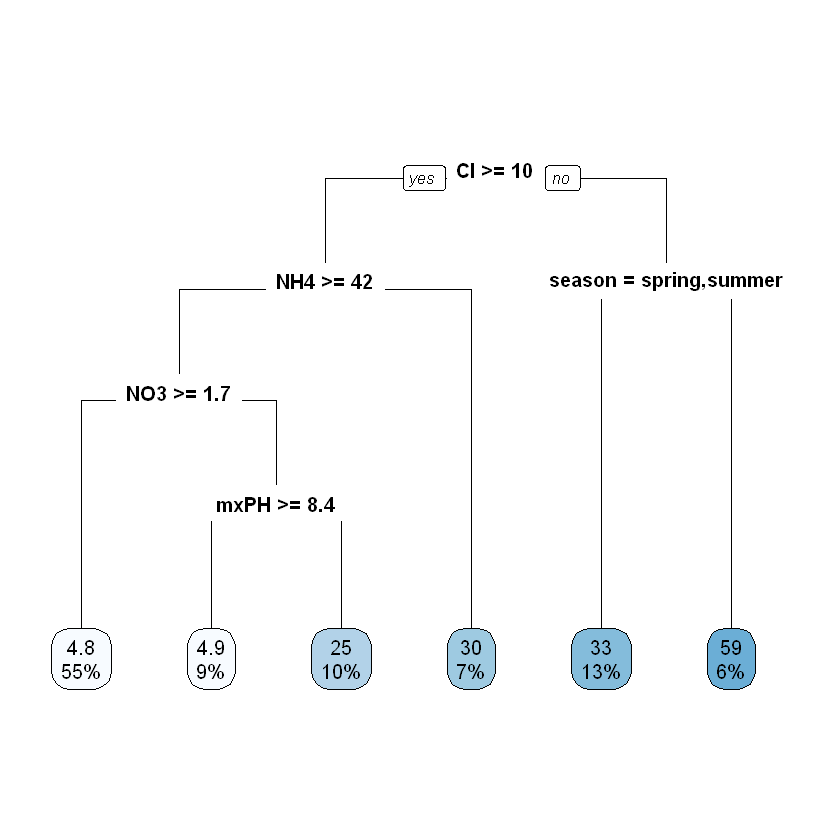

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

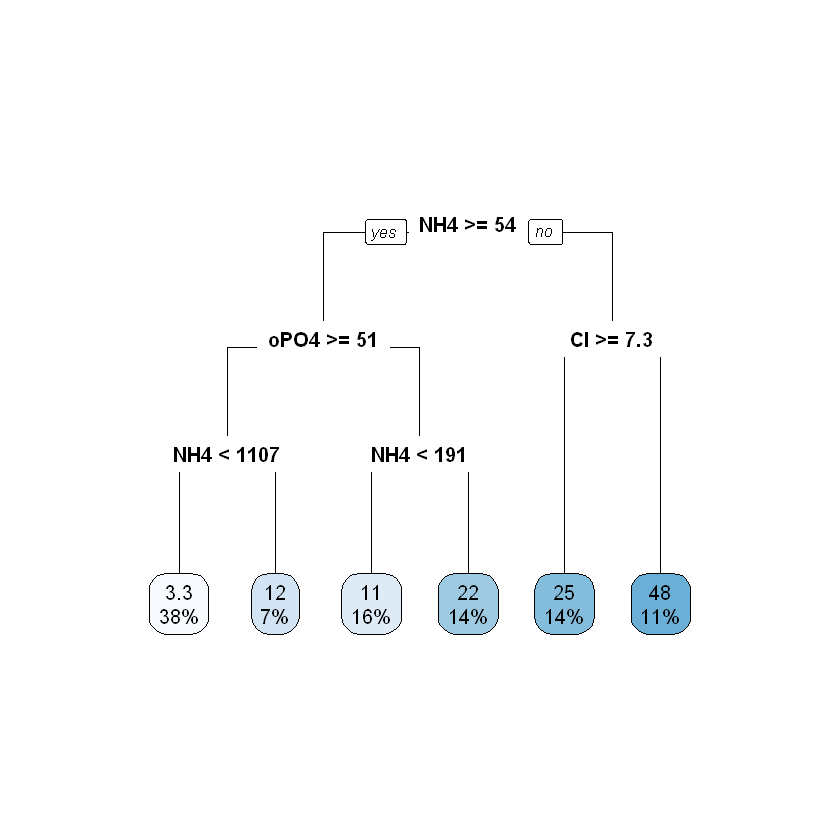

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

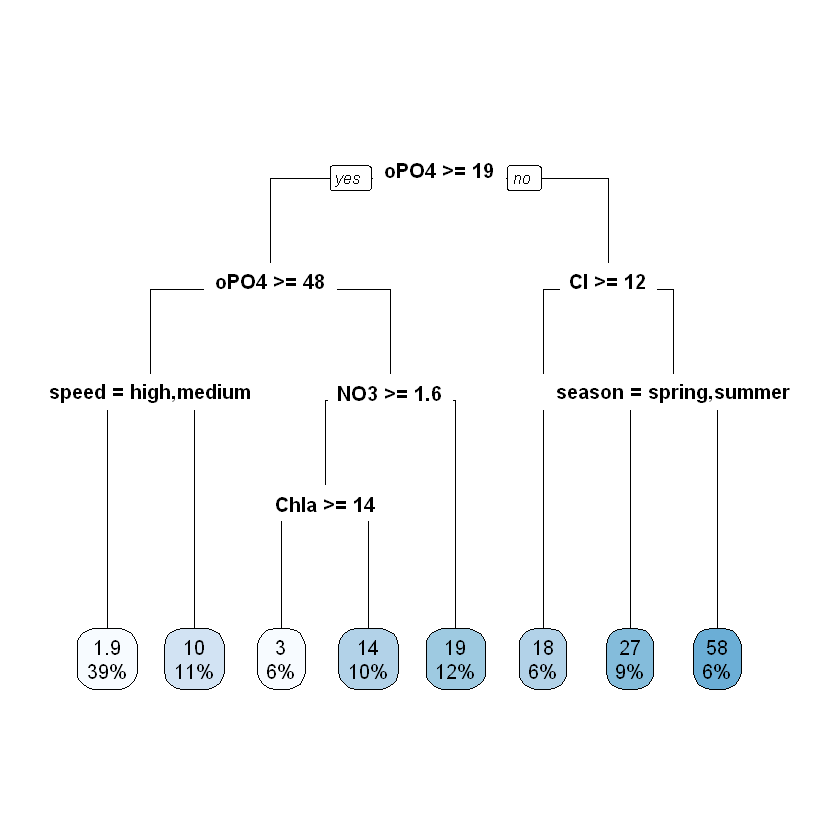

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

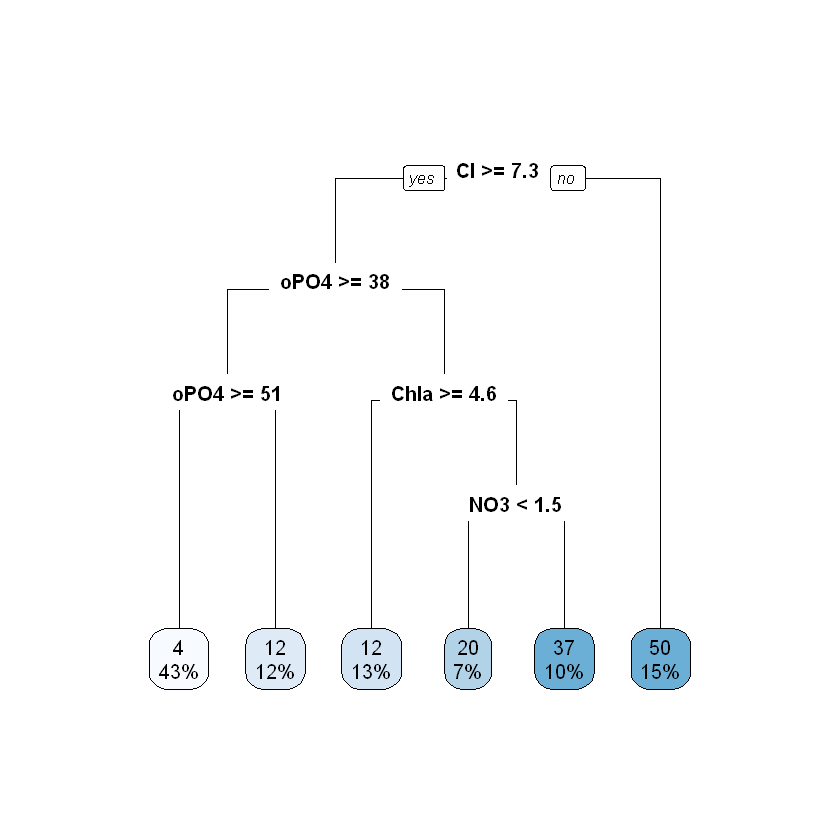

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

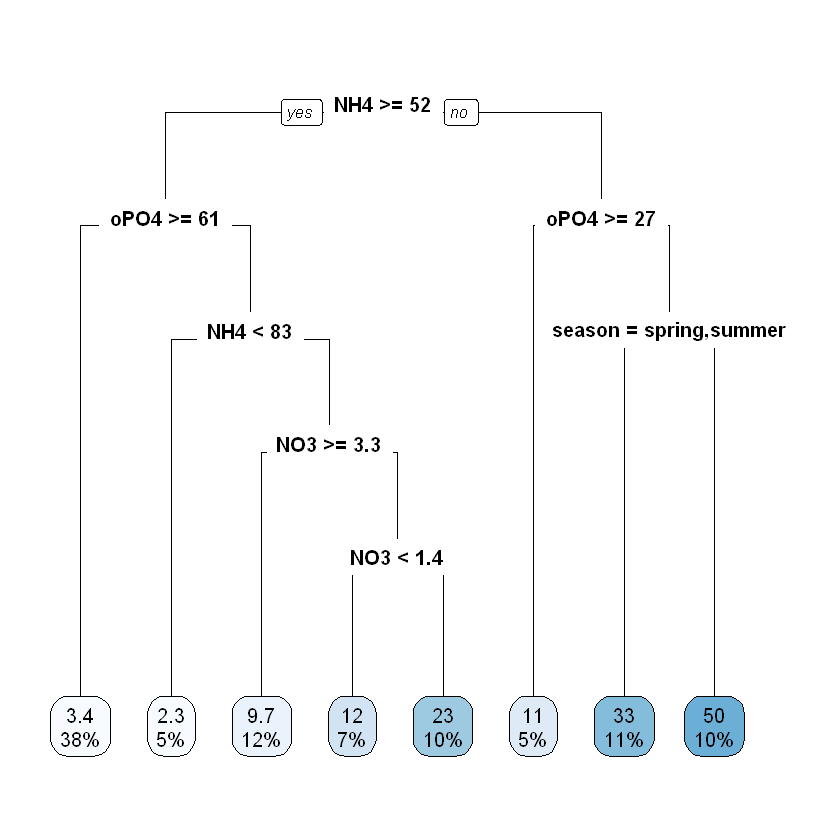

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

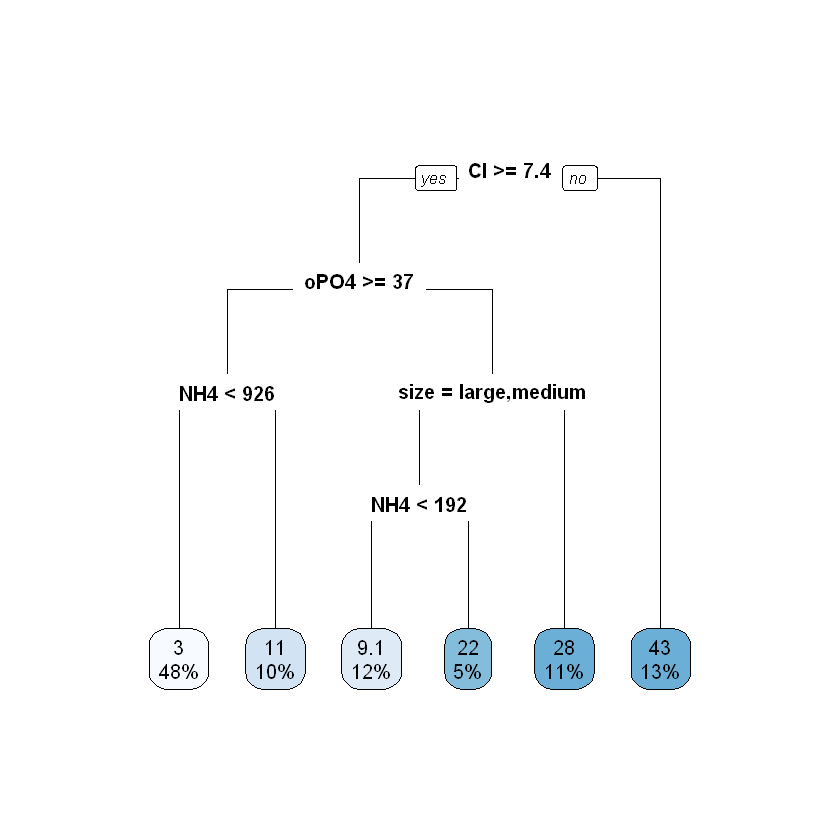

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

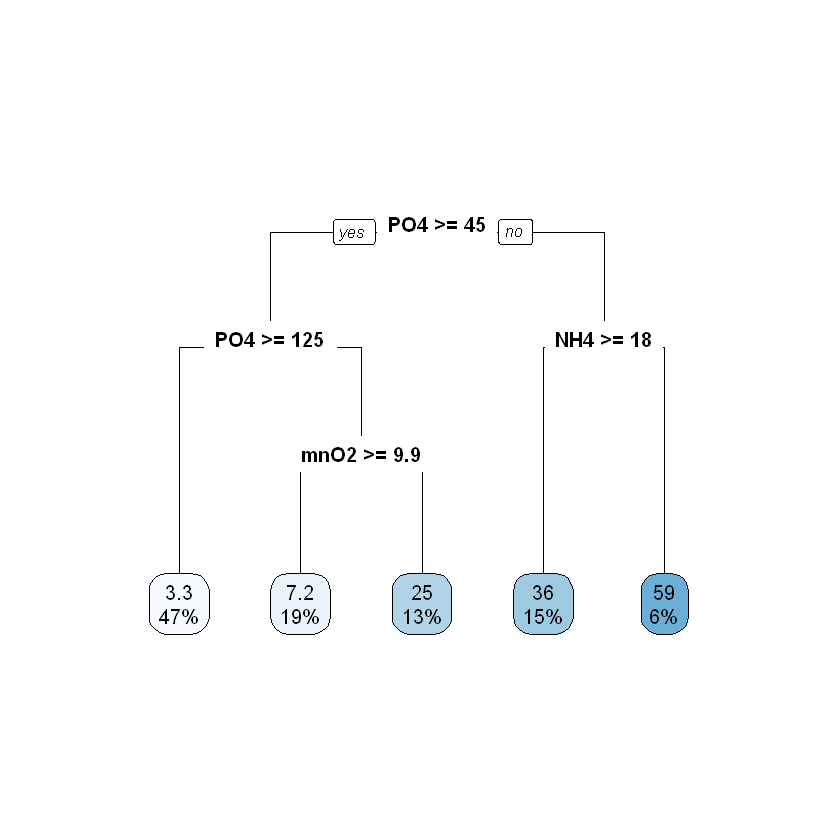

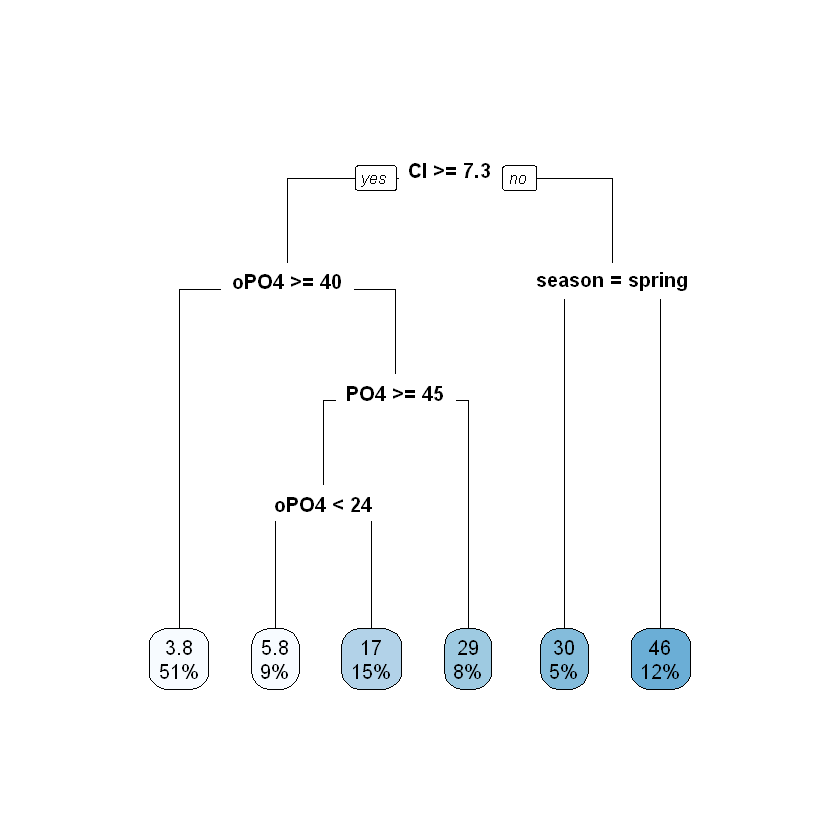

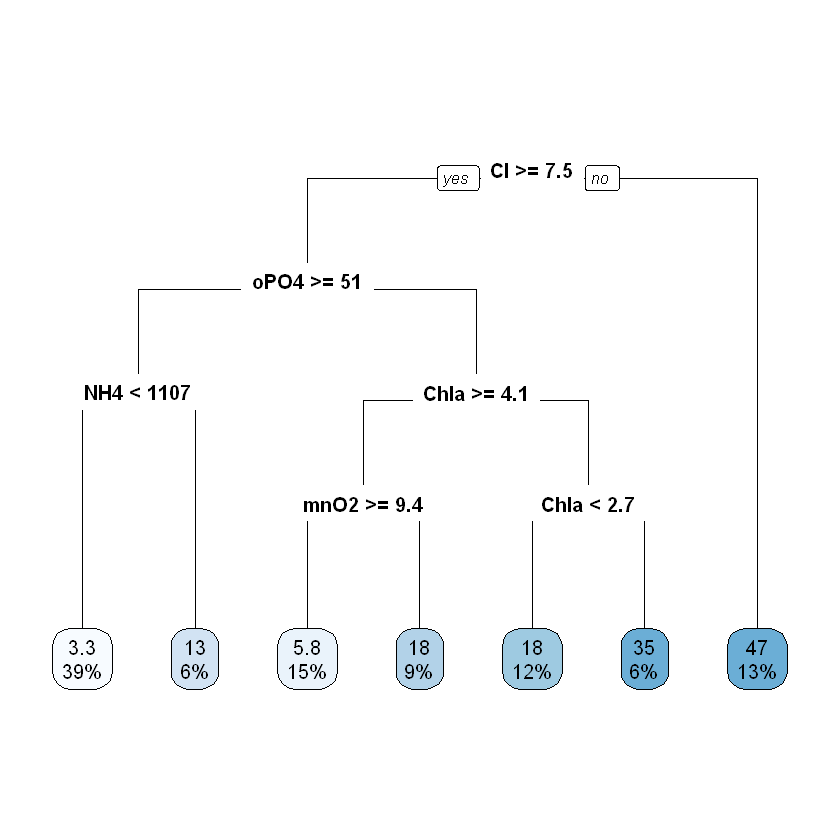

In [75]:
##Estimação dos valores faltantes tirando as linhas com valores faltantes
dados=AjeitaDados(dados)
dados2=dados[complete.cases(dados),]
metricas=c()
set.seed(7)
for(i in 1:10){
amostra1=S.SI(nrow(dados2),floor(nrow(dados2)*0.7))
treino=dados2[amostra1,]
teste=dados2[-amostra1,]
modelo2 <- rpart(a1 ~ ., data = treino[, 1:12])
rpart.plot(modelo2, type=0, varlen=10)
##Avaliação do modelo
metricas=append(metricas,mean((teste$a1-predict(modelo2,teste[1:11]))^2))
}

In [76]:
metricas
m2=cbind(mean(metricas),sd(metricas))
m=rbind(m1,m2)

[1] 225.4741 240.6407 235.5466 390.8965 206.3974 303.9713 286.8400 421.1458
 [9] 352.4588 249.6730

# Estimação dos valores faltantes pela média, mediana.

In [77]:
dados=AjeitaDados(dados)
##Variáveis que tem valores faltantes
apply(dados,2,function(x) sum(is.na(x)))

season   size  speed   mxPH   mnO2     Cl    NO3    NH4   oPO4    PO4   Chla 
     0      0      0      1      1      8      0      0      0      1     10 
    a1     a2     a3     a4     a5     a6     a7 
     0      0      0      0      0      0      0

# Variável mxPH

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."

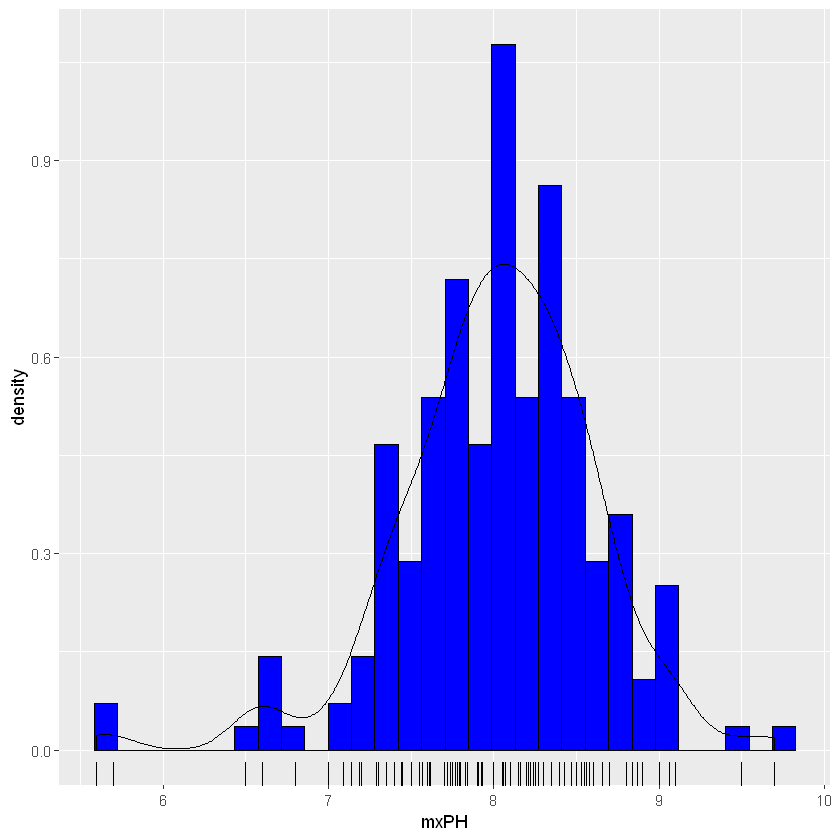

In [78]:
(ggplot(dados)+aes(mxPH)+geom_histogram(aes(y=..density..),color="black",fill="blue")
+geom_rug()+geom_density())

In [79]:
skewness(dados$mxPH,na.rm=T)
kurtosis(dados$mxPH,na.rm=T)

[1] -0.7012128

[1] 2.09604

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."

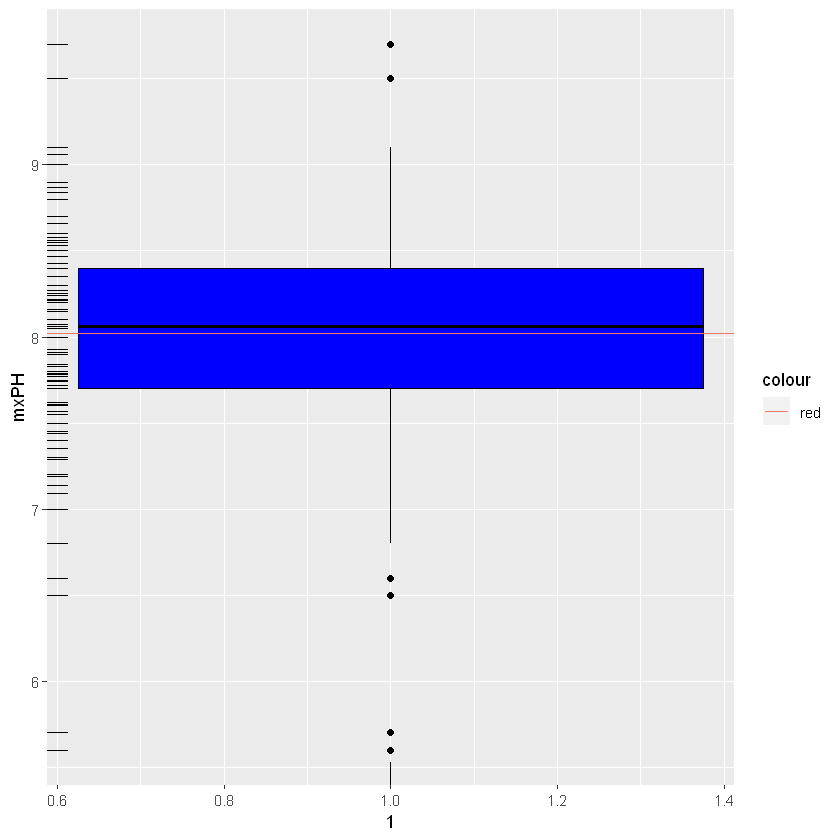

In [80]:
(ggplot(dados)+aes(1,mxPH)+geom_boxplot(fill="blue",color="black")
  +geom_rug()+geom_hline(aes(yintercept=mean(dados$mxPH,na.rm=T),color="red")))

In [81]:
##Proporção dos outliers
6/198

[1] 0.03030303

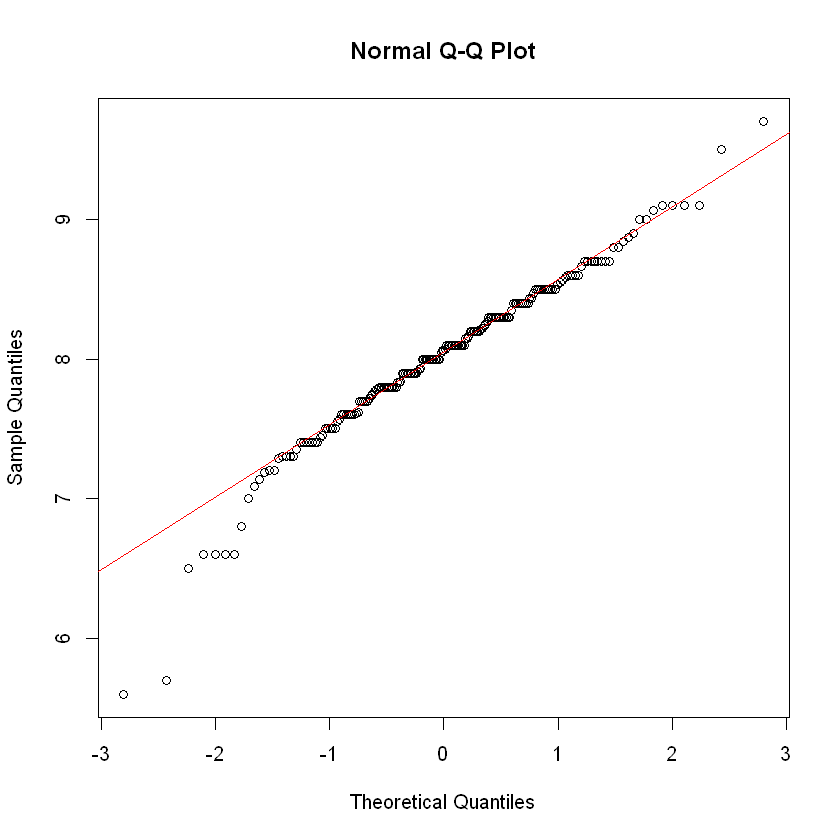

In [82]:
qqnorm(dados$mxPH)
qqline(dados$mxPH,col="red")

In [83]:
shapiro.test(dados$mxPH)
lillie.test(dados$mxPH)


	Shapiro-Wilk normality test

data:  dados$mxPH
W = 0.96383, p-value = 6.02e-05



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  dados$mxPH
D = 0.07041, p-value = 0.01886


# Conclusão: a variável mxPH pode ser considerada com distribuição normal com evidências do histograma e sua densidade estimada, assimetria e curtose, box-plot e a proporção de outlier chega perto de 5%, e um dos dois testes de hipóteses realizados não-rejeitam normalidade a nível de 1%, com isso o valor a ser imputado será a média.

In [84]:
x=which(is.na(dados$mxPH))
dados$mxPH[x]=mean(dados$mxPH,na.rm=T)

In [85]:
apply(dados,2,function(x) sum(is.na(x)))

season   size  speed   mxPH   mnO2     Cl    NO3    NH4   oPO4    PO4   Chla 
     0      0      0      0      1      8      0      0      0      1     10 
    a1     a2     a3     a4     a5     a6     a7 
     0      0      0      0      0      0      0

# Variável mnO2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."

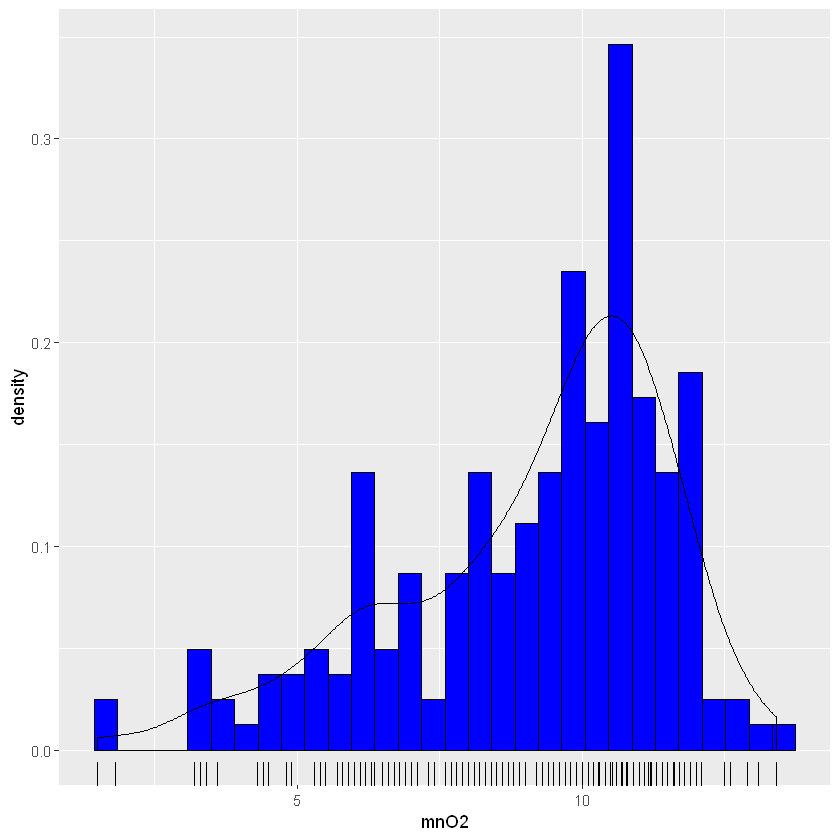

In [86]:
(ggplot(dados)+aes(mnO2)+geom_histogram(aes(y=..density..),color="black",fill="blue")
  +geom_rug()+geom_density())

In [87]:
skewness(dados$mnO2,na.rm=T)
kurtosis(dados$mnO2,na.rm=T)

[1] -0.8970891

[1] 0.2191285

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."

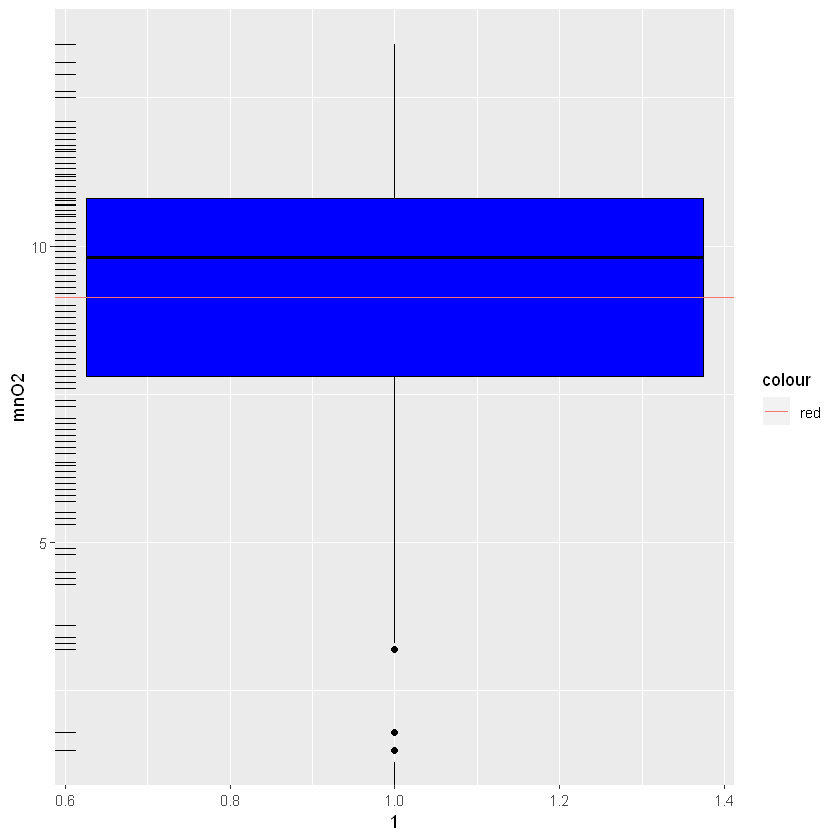

In [88]:
(ggplot(dados)+aes(1,mnO2)+geom_boxplot(fill="blue",color="black")
  +geom_rug()+geom_hline(aes(yintercept=mean(dados$mnO2,na.rm=T),color="red")))

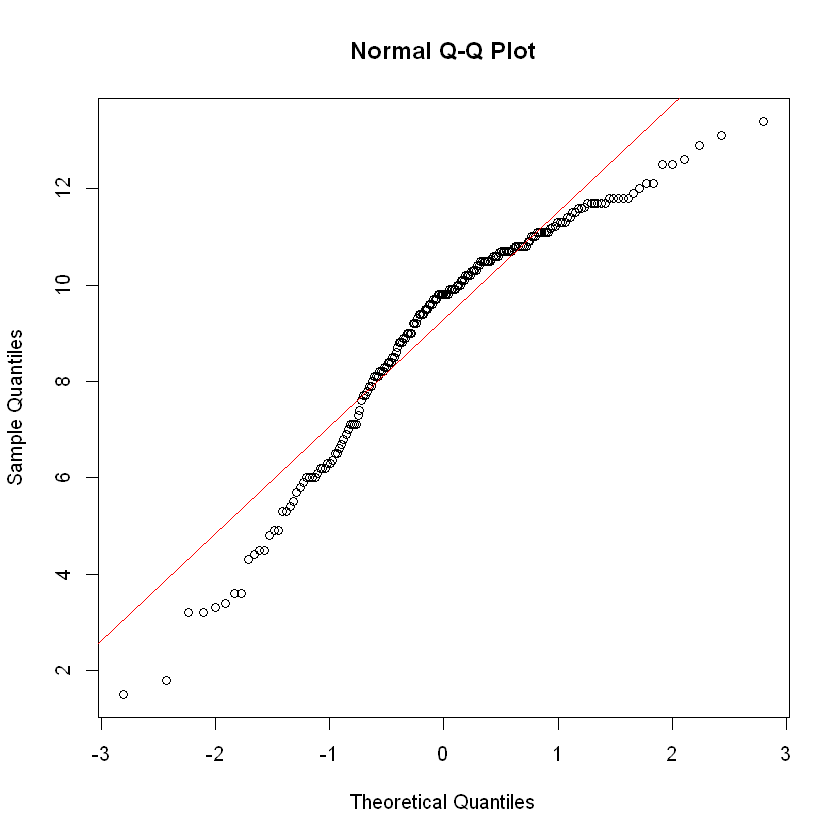

In [89]:
qqnorm(dados$mnO2)
qqline(dados$mnO2,col="red")

In [90]:
shapiro.test(dados$mnO2)
lillie.test(dados$mnO2)


	Shapiro-Wilk normality test

data:  dados$mnO2
W = 0.92941, p-value = 3.67e-08



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  dados$mnO2
D = 0.13446, p-value = 2.953e-09


# Conclusão: a variável mnO2 não pode ser considerada com distribuição normal pelas evidências do histograma e sua densidade estimada, assimetria e curtose, box-plot e os dois testes de hipóteses realizados rejeitaram normalidade, com isso o valor a ser imputado será a mediana.

In [91]:
x=which(is.na(dados$mnO2))
dados$mnO2[x]=median(dados$mnO2,na.rm=T)

In [92]:
apply(dados,2,function(x) sum(is.na(x)))

season   size  speed   mxPH   mnO2     Cl    NO3    NH4   oPO4    PO4   Chla 
     0      0      0      0      0      8      0      0      0      1     10 
    a1     a2     a3     a4     a5     a6     a7 
     0      0      0      0      0      0      0

# Variável Cl

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 8 rows containing non-finite values (stat_bin)."Warning message:
"Removed 8 rows containing non-finite values (stat_density)."

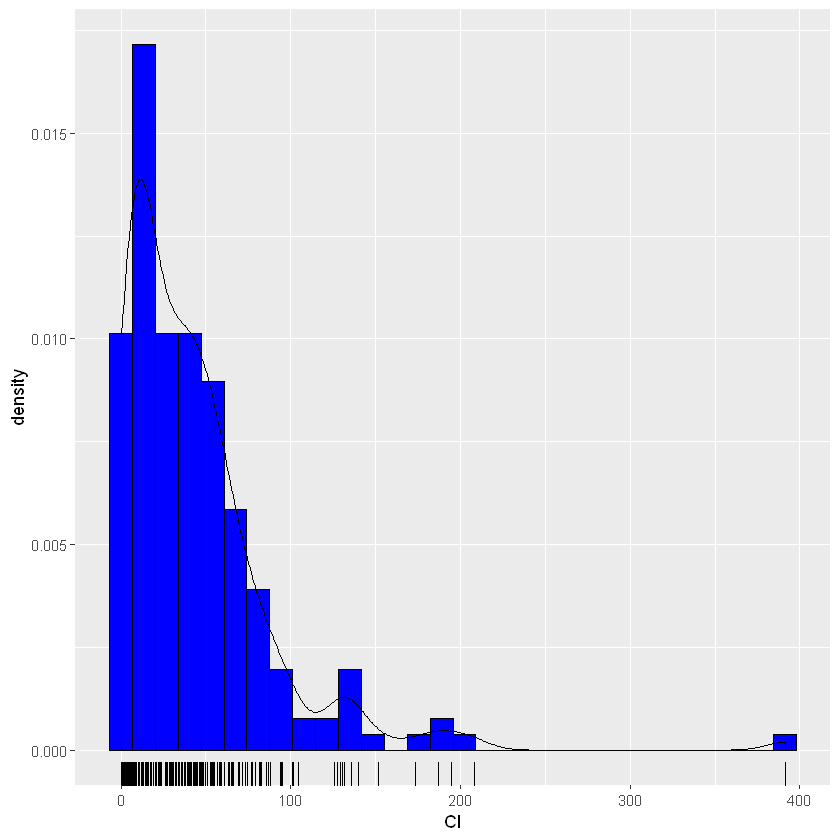

In [93]:
(ggplot(dados)+aes(Cl)+geom_histogram(aes(y=..density..),color="black",fill="blue")
  +geom_rug()+geom_density())

In [94]:
skewness(dados$Cl,na.rm=T)
kurtosis(dados$Cl,na.rm=T)

[1] 3.062211

[1] 16.01788

Warning message:
"Removed 8 rows containing non-finite values (stat_boxplot)."

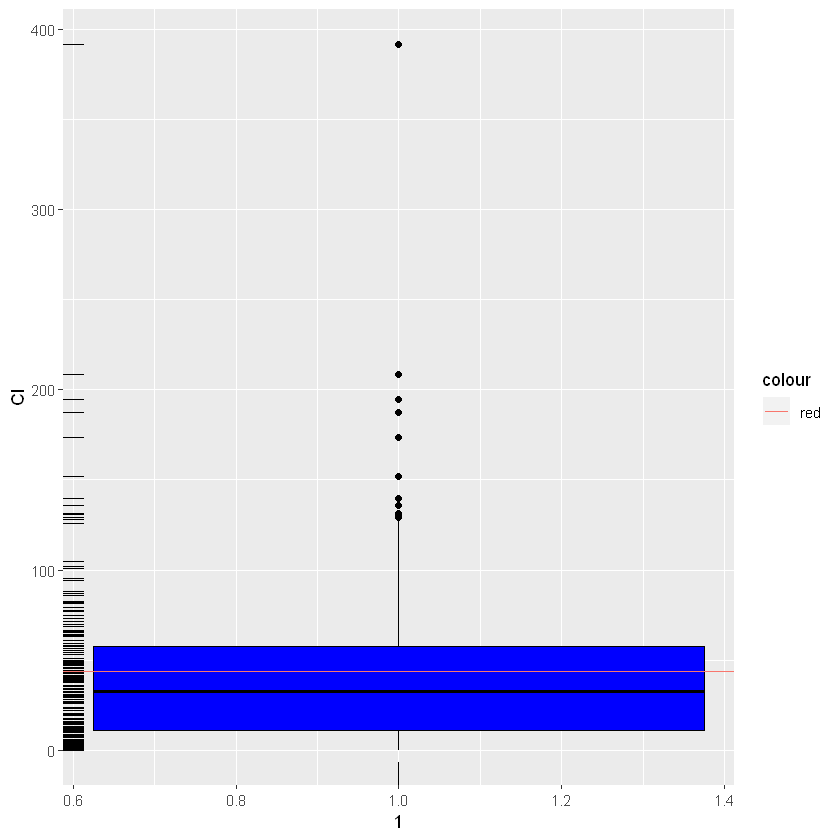

In [95]:
(ggplot(dados)+aes(1,Cl)+geom_boxplot(fill="blue",color="black")
  +geom_rug()+geom_hline(aes(yintercept=mean(dados$Cl,na.rm=T),color="red")))

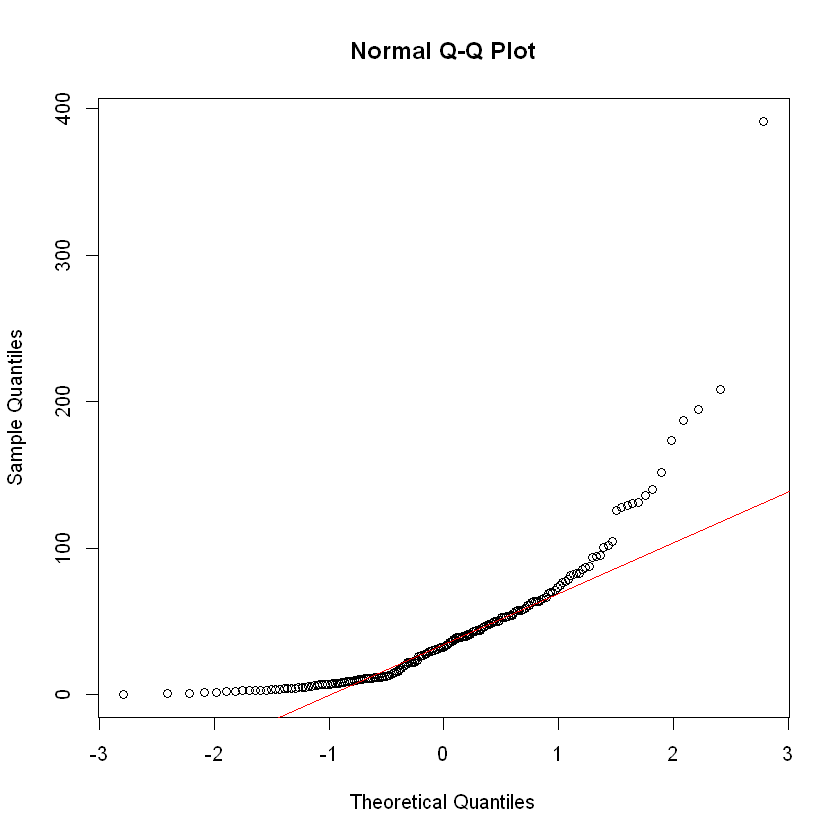

In [96]:
qqnorm(dados$Cl)
qqline(dados$Cl,col="red")

In [97]:
shapiro.test(dados$Cl)
lillie.test(dados$Cl)


	Shapiro-Wilk normality test

data:  dados$Cl
W = 0.74039, p-value < 2.2e-16



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  dados$Cl
D = 0.17695, p-value = 6.428e-16


# Conclusão: a variável Cl não pode ser considerada com distribuição normal pelas evidências do histograma e sua densidade estimada, assimetria e calda bem mais pesado que a normal, box-plot e os dois testes de hipóteses realizados rejeitaram normalidade, com isso o valor a ser imputado será a mediana por ser mais robusta nessa situação.

In [98]:
x=which(is.na(dados$Cl));x
dados$Cl[x]=median(dados$Cl,na.rm=T)

[1]  55  56  57  58  59  60  61 160

In [99]:
apply(dados,2,function(x) sum(is.na(x)))

season   size  speed   mxPH   mnO2     Cl    NO3    NH4   oPO4    PO4   Chla 
     0      0      0      0      0      0      0      0      0      1     10 
    a1     a2     a3     a4     a5     a6     a7 
     0      0      0      0      0      0      0

# Variável PO4

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."

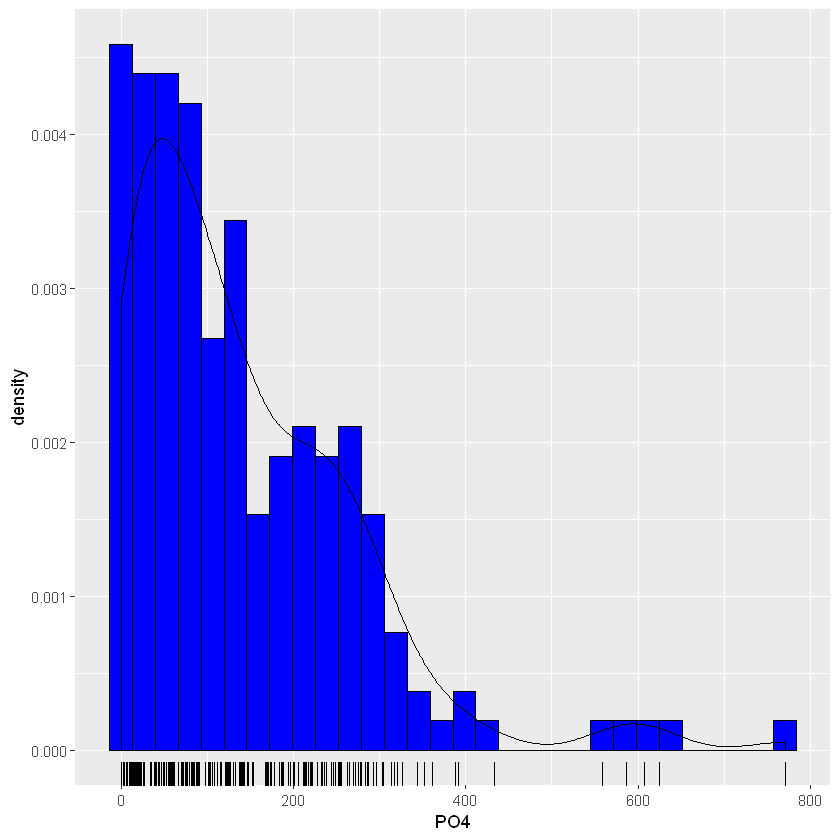

In [100]:
(ggplot(dados)+aes(PO4)+geom_histogram(aes(y=..density..),color="black",fill="blue")
  +geom_rug()+geom_density())

In [101]:
skewness(dados$PO4,na.rm=T)
kurtosis(dados$PO4,na.rm=T)

[1] 1.657997

[1] 4.037415

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."

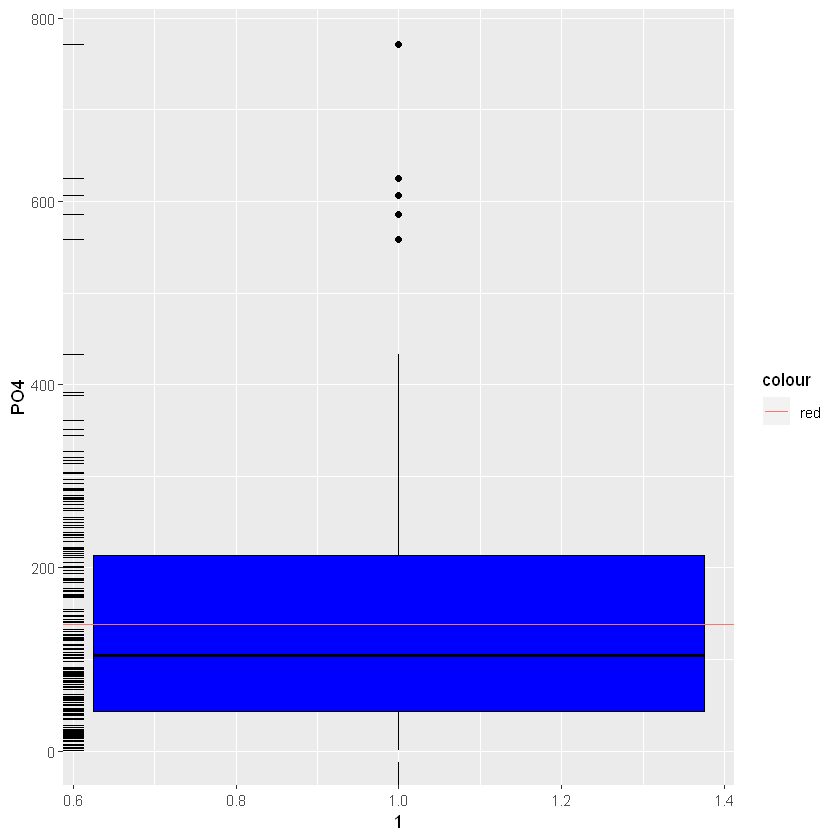

In [102]:
(ggplot(dados)+aes(1,PO4)+geom_boxplot(fill="blue",color="black")
  +geom_rug()+geom_hline(aes(yintercept=mean(dados$PO4,na.rm=T),color="red")))

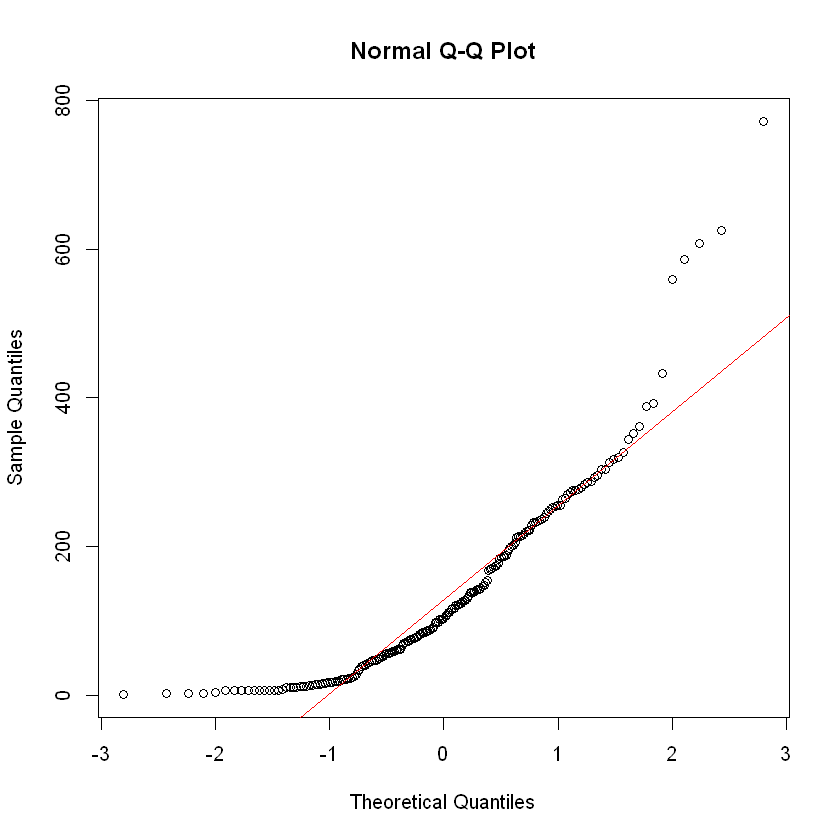

In [103]:
qqnorm(dados$PO4)
qqline(dados$PO4,col="red")

In [104]:
shapiro.test(dados$PO4)
lillie.test(dados$PO4)


	Shapiro-Wilk normality test

data:  dados$PO4
W = 0.85277, p-value = 7.602e-13



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  dados$PO4
D = 0.14325, p-value = 1.403e-10


In [105]:
x=which(is.na(dados$PO4))
dados$PO4[x]=median(dados$PO4,na.rm=T)

In [106]:
apply(dados,2,function(x) sum(is.na(x)))

season   size  speed   mxPH   mnO2     Cl    NO3    NH4   oPO4    PO4   Chla 
     0      0      0      0      0      0      0      0      0      0     10 
    a1     a2     a3     a4     a5     a6     a7 
     0      0      0      0      0      0      0

# Conclusão: a variável PO4 não pode ser considerada com distribuição normal pelas evidências do histograma e sua densidade estimada, assimetria e calda bem mais pesado que a normal, box-plot e os dois testes de hipóteses realizados rejeitaram normalidade, com isso o valor a ser imputado será a mediana por ser mais robusta nessa situação.¶

# Variável Chla

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 10 rows containing non-finite values (stat_bin)."Warning message:
"Removed 10 rows containing non-finite values (stat_density)."

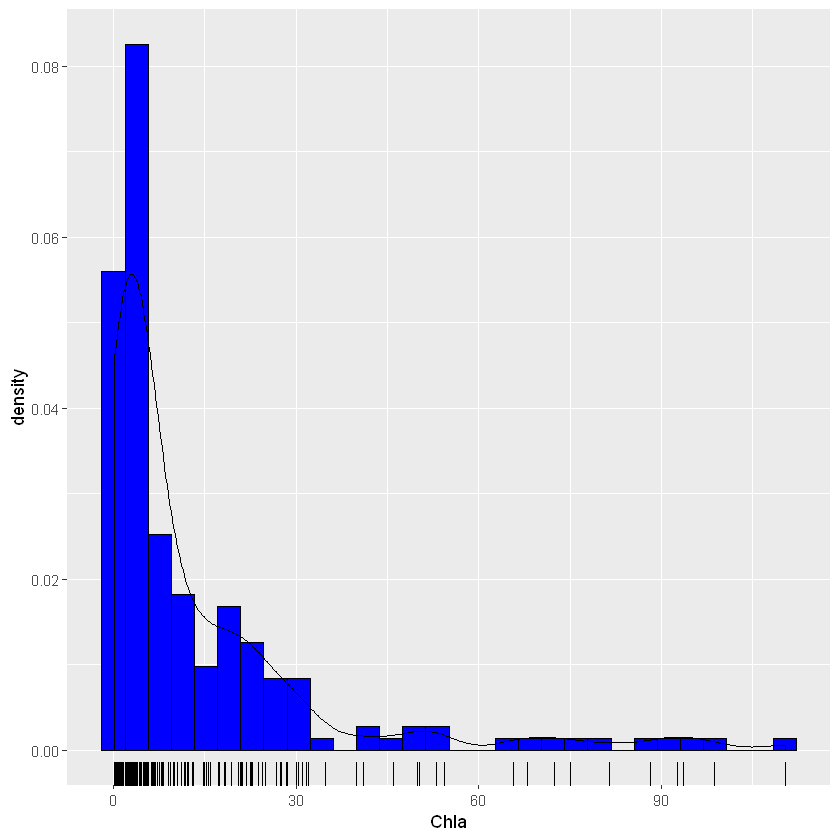

In [107]:
(ggplot(dados)+aes(Chla)+geom_histogram(aes(y=..density..),color="black",fill="blue")
  +geom_rug()+geom_density())

In [108]:
skewness(dados$Chla,na.rm=T)
kurtosis(dados$Chla,na.rm=T)

[1] 2.549785

[1] 6.741053

Warning message:
"Removed 10 rows containing non-finite values (stat_boxplot)."

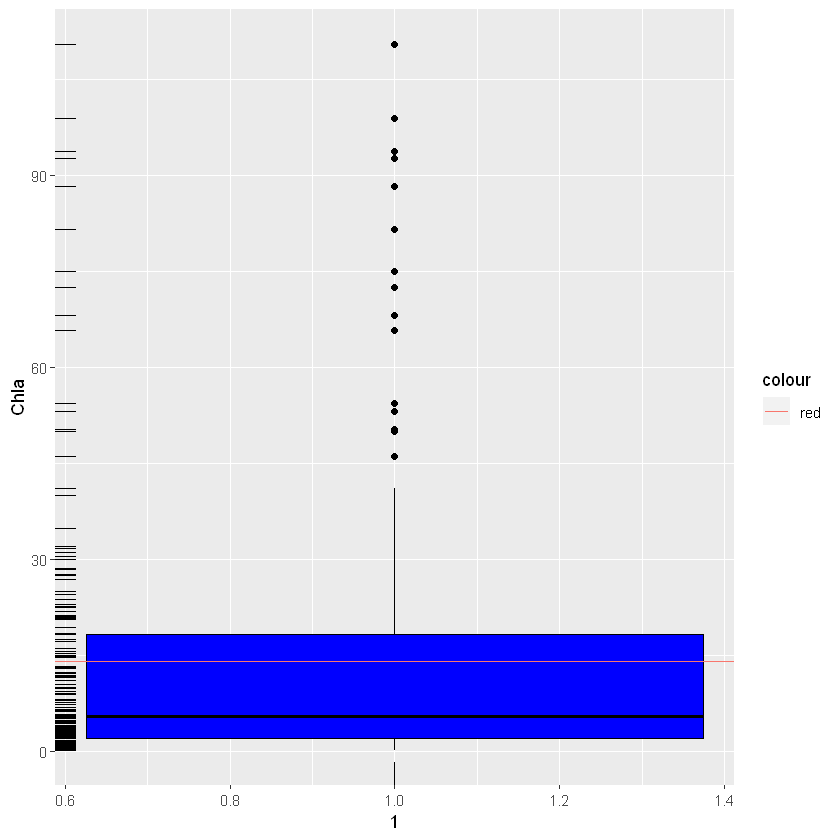

In [109]:
(ggplot(dados)+aes(1,Chla)+geom_boxplot(fill="blue",color="black")
  +geom_rug()+geom_hline(aes(yintercept=mean(dados$Chla,na.rm=T),color="red")))

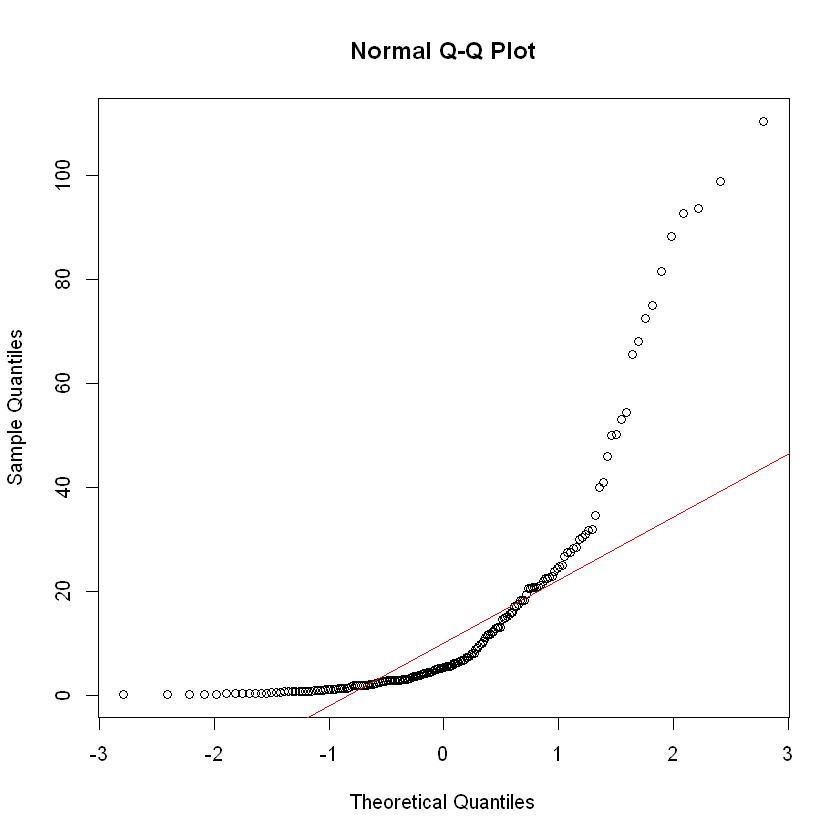

In [110]:
qqnorm(dados$Chla)
qqline(dados$Chla,col="red")

In [111]:
shapiro.test(dados$Chla)
lillie.test(dados$Chla)


	Shapiro-Wilk normality test

data:  dados$Chla
W = 0.65571, p-value < 2.2e-16



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  dados$Chla
D = 0.25082, p-value < 2.2e-16


# Conclusão: a variável Chla não pode ser considerada com distribuição normal pelas evidências do histograma e sua densidade estimada, assimetria e calda bem mais pesado que a normal, box-plot e os dois testes de hipóteses realizados rejeitaram normalidade, com isso o valor a ser imputado será a mediana por ser mais robusta nessa situação.

In [112]:
x=which(is.na(dados$Chla));x
dados$Chla[x]=median(dados$Chla,na.rm=T)

[1]  55  56  57  58  59  60  61  62 115 183

In [113]:
apply(dados,2,function(x) sum(is.na(x)))

season   size  speed   mxPH   mnO2     Cl    NO3    NH4   oPO4    PO4   Chla 
     0      0      0      0      0      0      0      0      0      0      0 
    a1     a2     a3     a4     a5     a6     a7 
     0      0      0      0      0      0      0

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

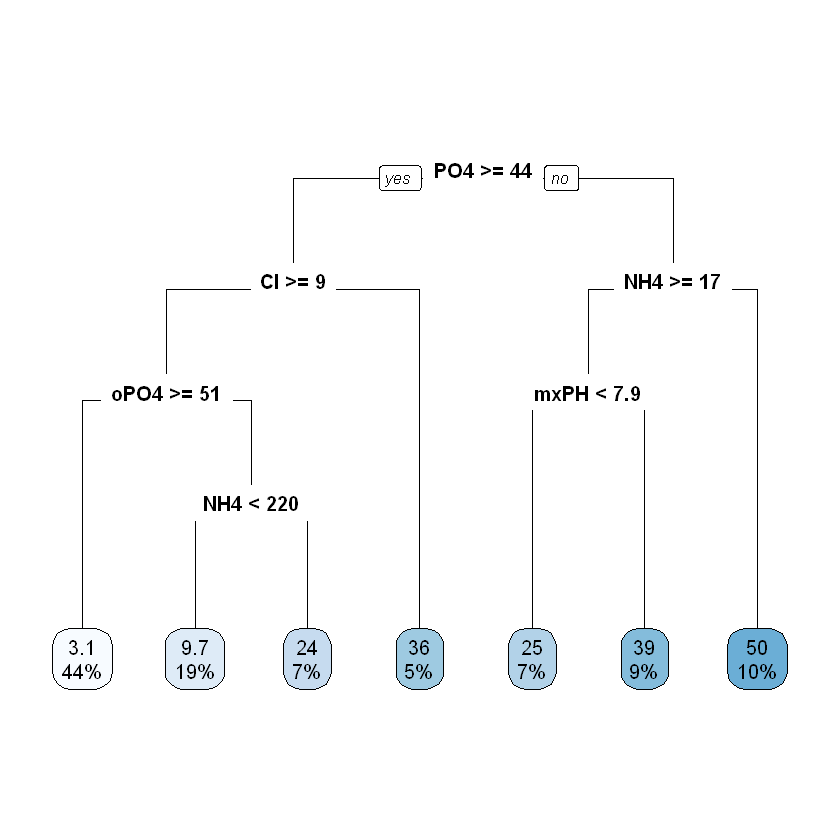

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

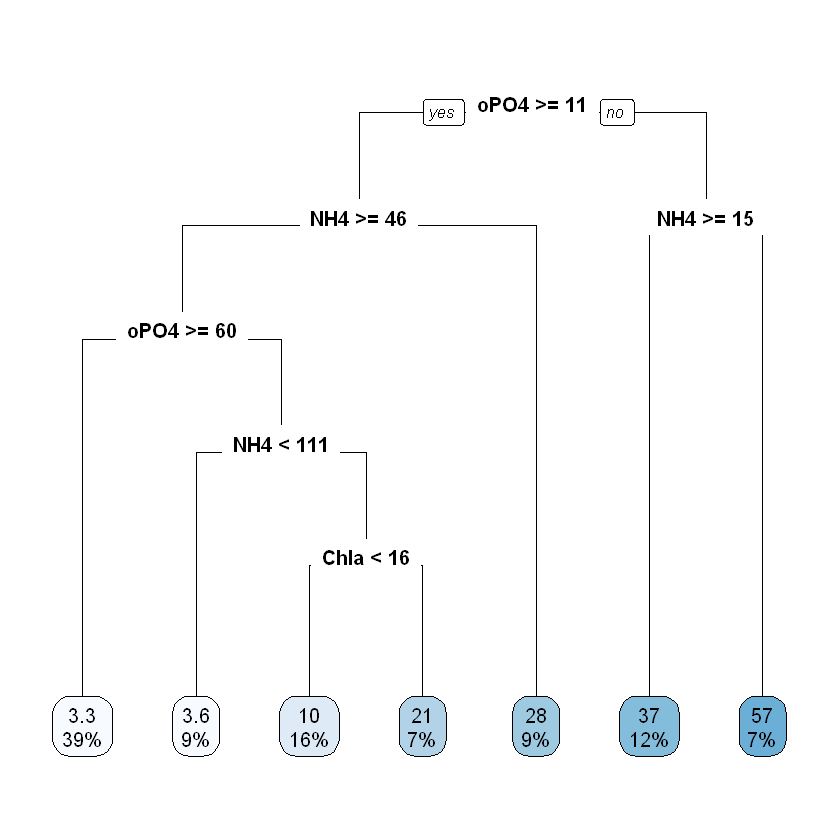

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

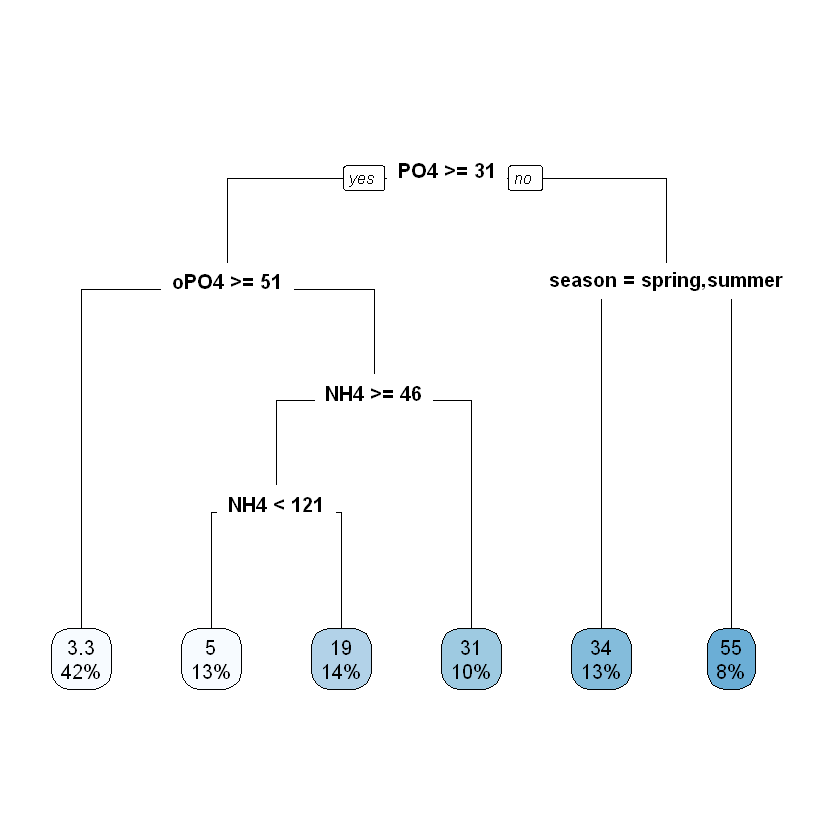

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

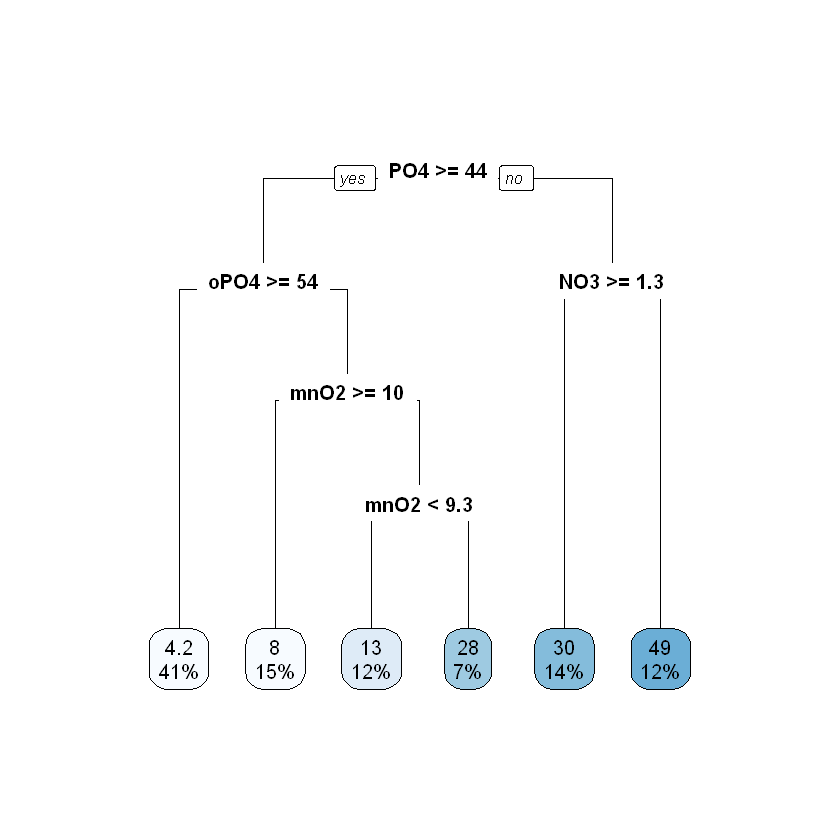

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

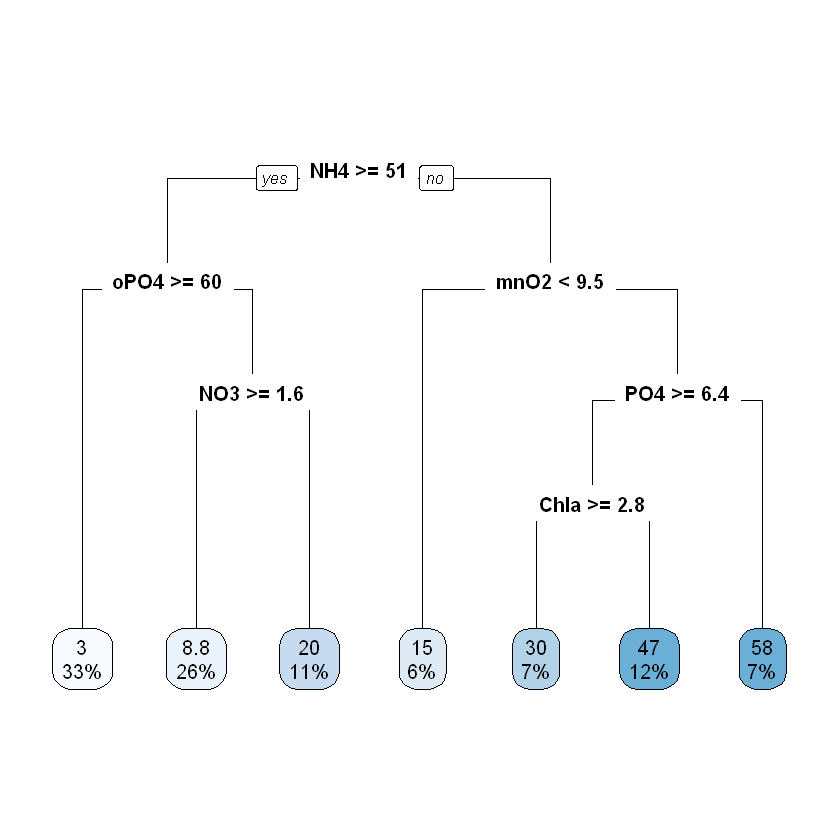

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

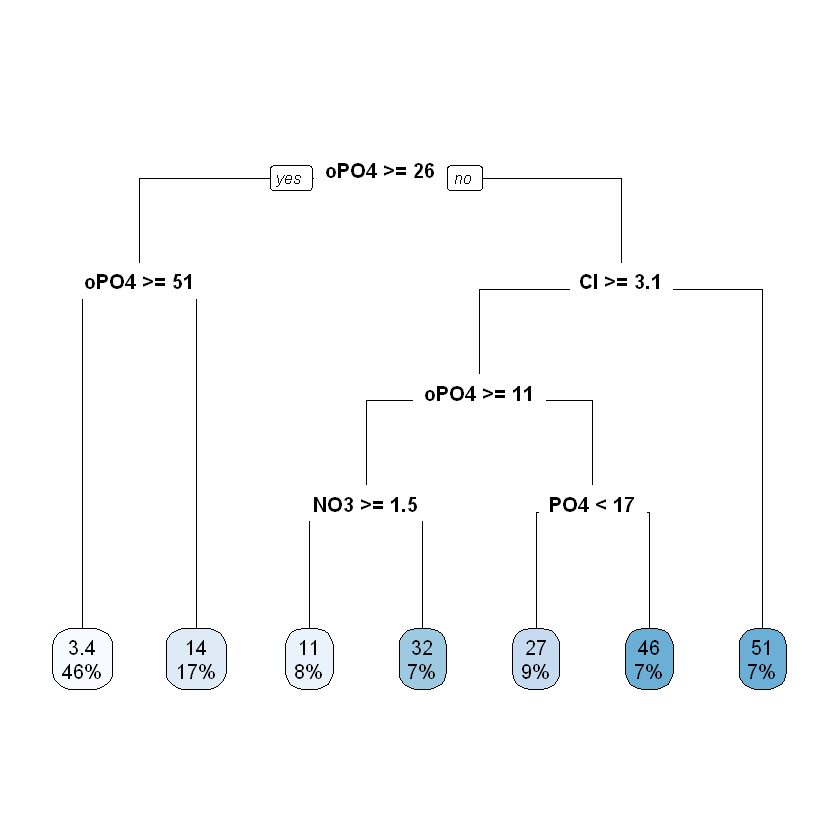

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

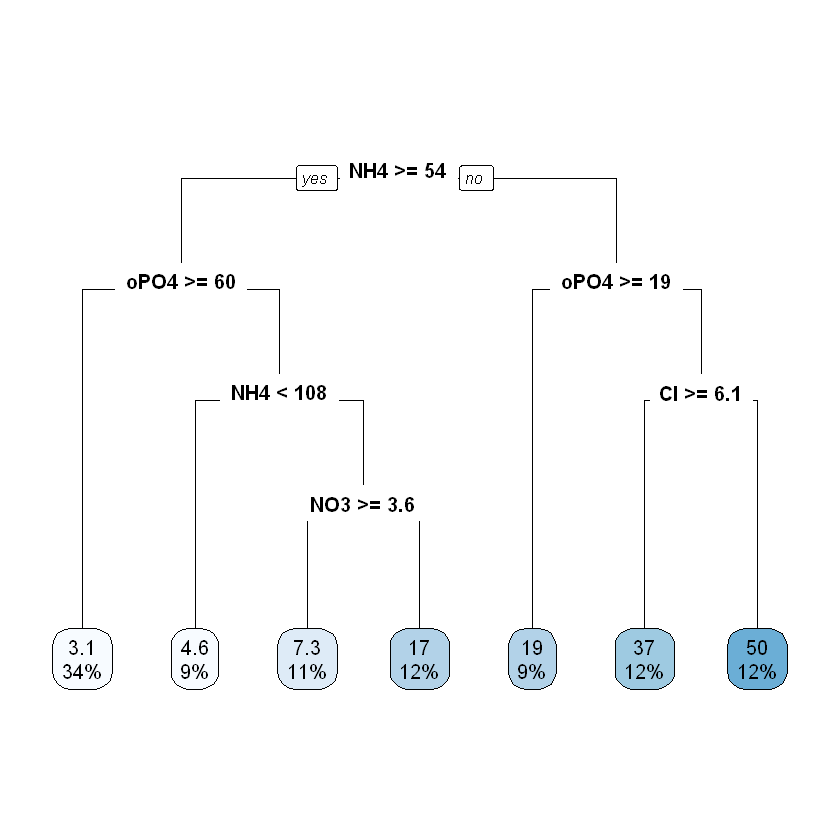

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

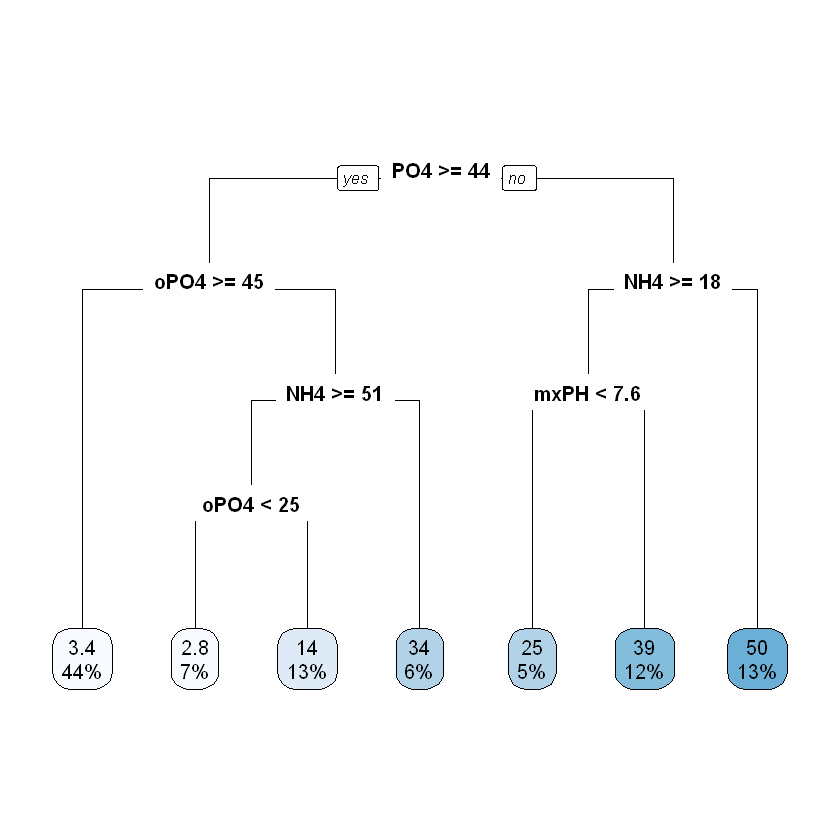

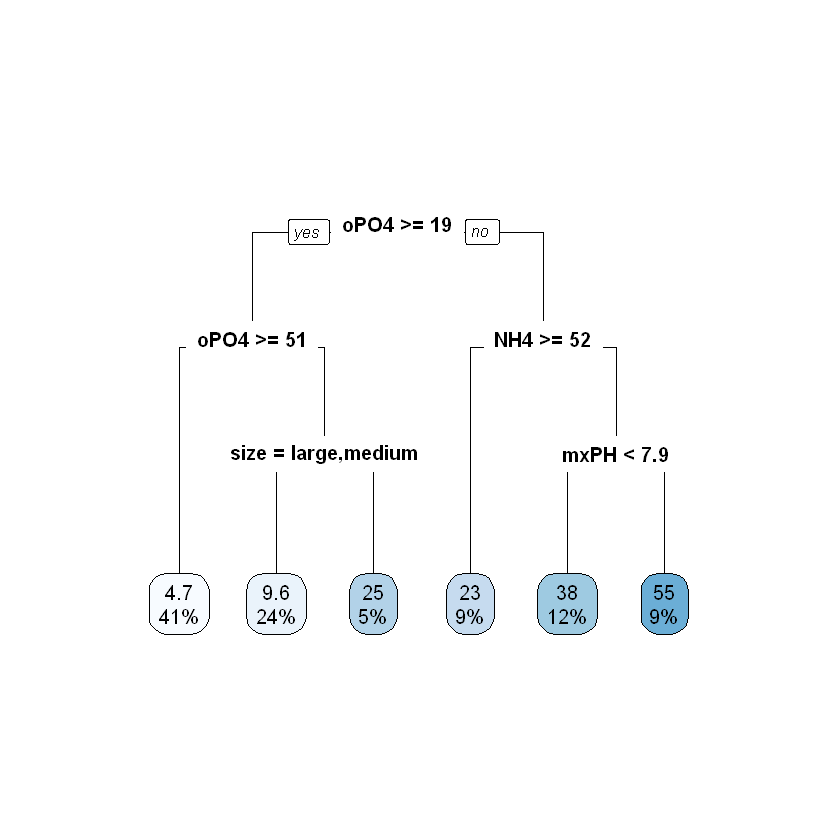

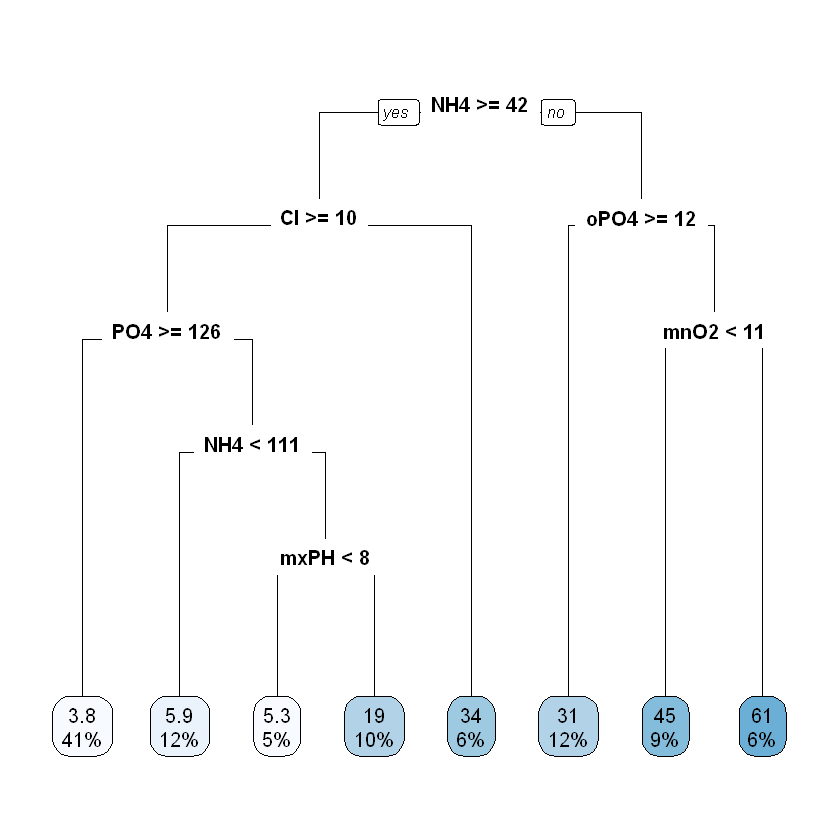

In [114]:
metricas=c()
set.seed(7)
for(i in 1:10){
amostra=S.SI(nrow(dados),floor(nrow(dados)*0.7))
treino=dados[amostra,]
teste=dados[-amostra,]
modelo3=rpart(a1 ~ ., data = treino[, 1:12])
rpart.plot(modelo3, type=0, varlen=10)
##Avaliação da performance do modelo
metricas=append(metricas,mean((teste$a1-predict(modelo3,teste[,1:11]))^2))
}

In [115]:
metricas
m3=cbind(mean(metricas),sd(metricas))
m=rbind(m,m3)

[1] 316.7298 333.2860 381.4759 350.1357 432.8505 496.8815 309.1069 198.2645
 [9] 280.9199 348.1682

# Estimando pela correlação entre as variáveis

In [116]:
dados=AjeitaDados(dados)
apply(dados,2,function(x) sum(is.na(x)))

season   size  speed   mxPH   mnO2     Cl    NO3    NH4   oPO4    PO4   Chla 
     0      0      0      1      1      8      0      0      0      1     10 
    a1     a2     a3     a4     a5     a6     a7 
     0      0      0      0      0      0      0

# Matriz de correlações

In [117]:
symnum(cor(dados[,4:18],use="complete.obs"))

     mP mO Cl NO NH o P Ch a1 a2 a3 a4 a5 a6 a7
mxPH 1                                         
mnO2    1                                      
Cl         1                                   
NO3           1                                
NH4           ,  1                             
oPO4    .  .        1                          
PO4     .  .        * 1                        
Chla .                  1                      
a1         .        . .    1                   
a2   .                  .     1                
a3                               1             
a4      .           . .             1          
a5                                     1       
a6            .  .                     .  1    
a7                                           1 
attr(,"legend")
[1] 0 ' ' 0.3 '.' 0.6 ',' 0.8 '+' 0.9 '*' 0.95 'B' 1

# Variável PO4

Warning message:
"Removed 1 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 1 rows containing missing values (geom_point)."

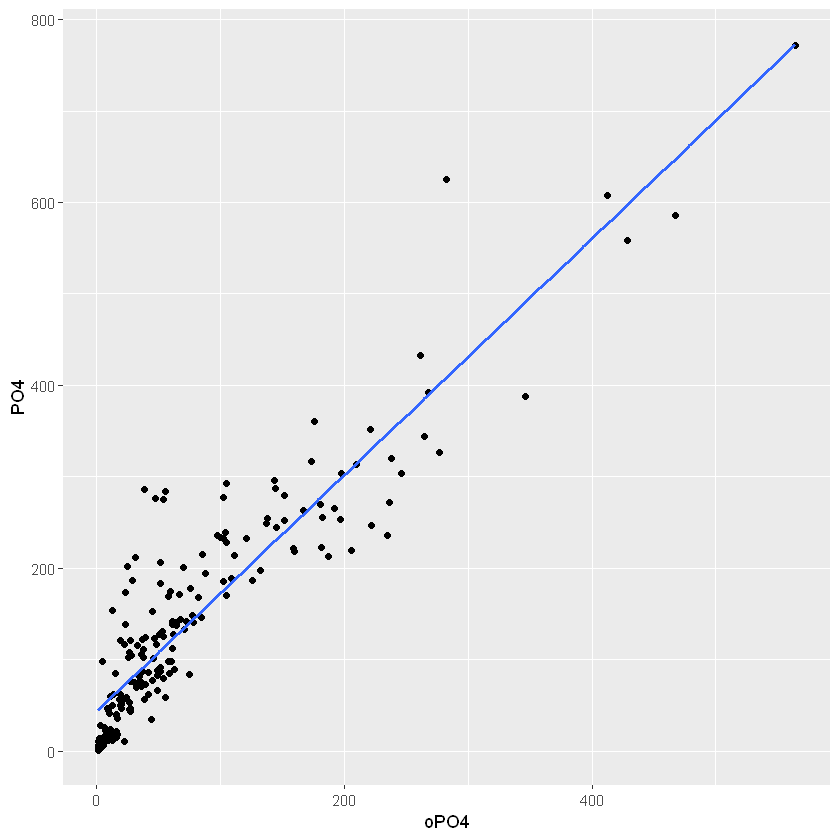

In [118]:
#0.91196460
ggplot(dados)+aes(oPO4,PO4)+geom_point()+geom_smooth(method="lm",se=F)

In [119]:
x=lm(dados$PO4 ~ dados$oPO4, data=dados)
summary(x)


Call:
lm(formula = dados$PO4 ~ dados$oPO4, data = dados)

Residuals:
    Min      1Q  Median      3Q     Max 
-110.12  -36.34  -12.68   23.26  216.98 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   42.897      4.808   8.922 3.34e-16 ***
dados$oPO4     1.293      0.041  31.535  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 52.37 on 195 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.8361,	Adjusted R-squared:  0.8352 
F-statistic: 994.5 on 1 and 195 DF,  p-value: < 2.2e-16


In [120]:
a=which(is.na(dados$PO4))
dados$PO4[a]=x$coefficients%*%t(t(c(1,dados$oPO4[a])))

In [121]:
apply(dados,2,function(x) sum(is.na(x)))

season   size  speed   mxPH   mnO2     Cl    NO3    NH4   oPO4    PO4   Chla 
     0      0      0      1      1      8      0      0      0      0     10 
    a1     a2     a3     a4     a5     a6     a7 
     0      0      0      0      0      0      0

# Variável Chla

Warning message:
"Removed 11 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 11 rows containing missing values (geom_point)."

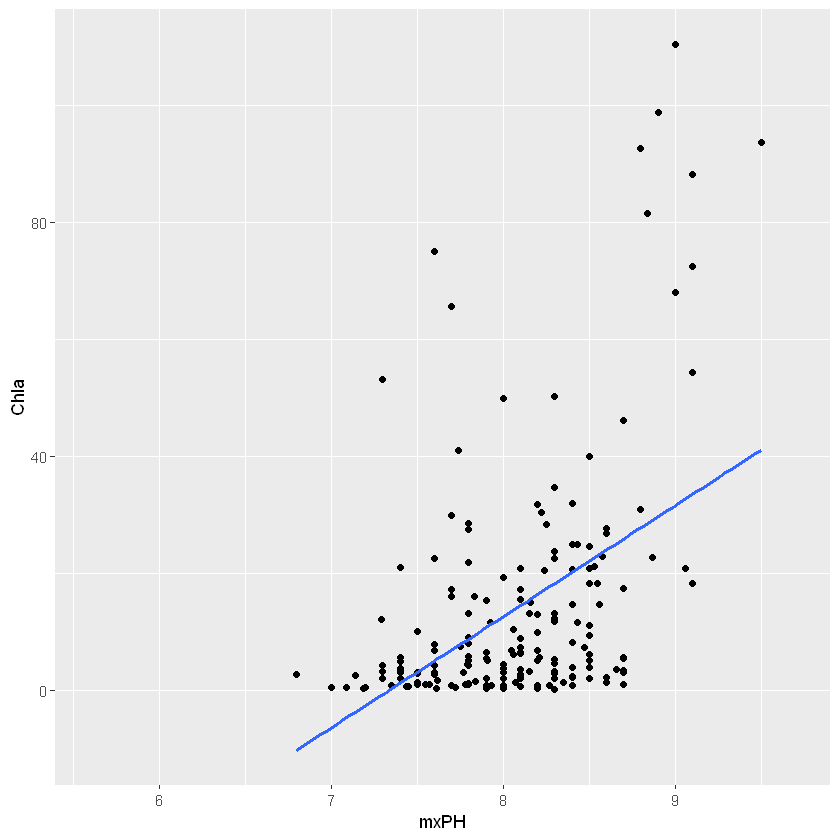

In [122]:
#0.443046449
ggplot(dados)+aes(mxPH,Chla)+geom_point()+geom_smooth(method="lm",se=F)

In [123]:
x=lm(dados$Chla ~ dados$mxPH, data=dados)
summary(x)


Call:
lm(formula = dados$Chla ~ dados$mxPH, data = dados)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.894 -10.937  -3.795   4.102  78.864 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -139.365     22.676  -6.146 4.77e-09 ***
dados$mxPH    18.995      2.803   6.777 1.59e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 18.42 on 185 degrees of freedom
  (11 observations deleted due to missingness)
Multiple R-squared:  0.1989,	Adjusted R-squared:  0.1946 
F-statistic: 45.93 on 1 and 185 DF,  p-value: 1.59e-10


In [124]:
a=which(is.na(dados$Chla));a
dados$Chla[a]=cbind(rep(1,length(a)),dados$mxPH[a])%*%t(t(x$coefficients))

[1]  55  56  57  58  59  60  61  62 115 183

In [125]:
apply(dados,2,function(x) sum(is.na(x)))

season   size  speed   mxPH   mnO2     Cl    NO3    NH4   oPO4    PO4   Chla 
     0      0      0      1      1      8      0      0      0      0      0 
    a1     a2     a3     a4     a5     a6     a7 
     0      0      0      0      0      0      0

# Variável mxPH

Warning message:
"Removed 1 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 1 rows containing missing values (geom_point)."

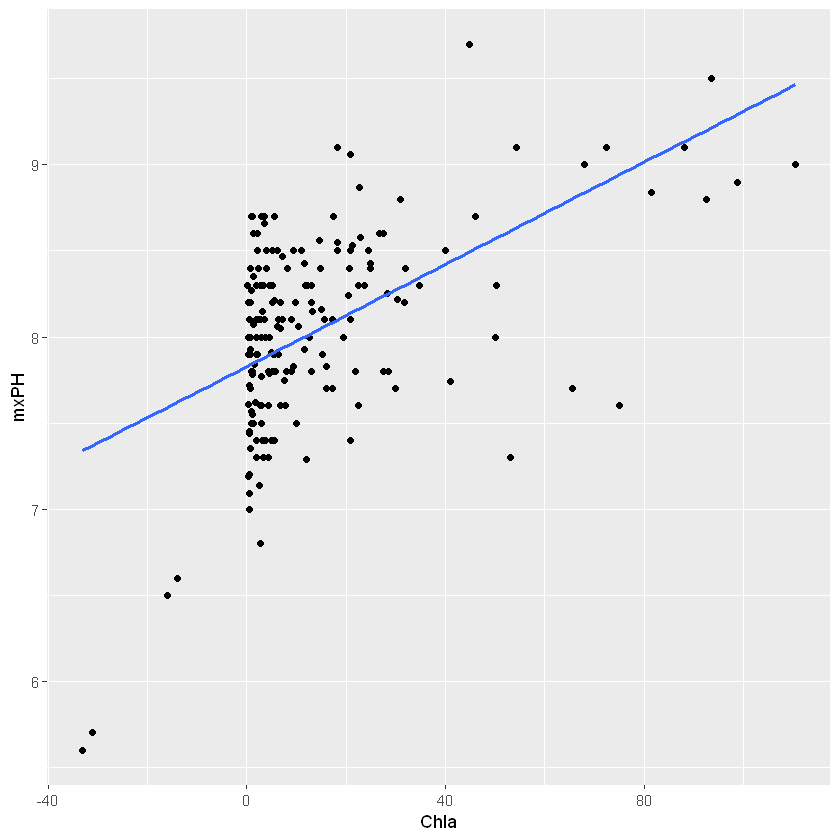

In [126]:
#0.443046449
ggplot(dados)+aes(Chla,mxPH)+geom_point()+geom_smooth(method="lm",se=F)

In [127]:
x=lm(dados$mxPH ~ dados$Chla, data=dados)
summary(x)


Call:
lm(formula = dados$mxPH ~ dados$Chla, data = dados)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.73819 -0.32837  0.07676  0.35335  1.20671 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.827511   0.041961 186.543  < 2e-16 ***
dados$Chla  0.014832   0.001696   8.746 1.03e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5015 on 195 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.2817,	Adjusted R-squared:  0.278 
F-statistic: 76.49 on 1 and 195 DF,  p-value: 1.033e-15


In [128]:
a=which(is.na(dados$mxPH))
dados$mxPH[a]=cbind(rep(1,length(a)),dados$Chla[a])%*%t(t(x$coefficients))

In [129]:
apply(dados,2,function(x) sum(is.na(x)))

season   size  speed   mxPH   mnO2     Cl    NO3    NH4   oPO4    PO4   Chla 
     0      0      0      0      1      8      0      0      0      0      0 
    a1     a2     a3     a4     a5     a6     a7 
     0      0      0      0      0      0      0

# Variável Cl

Warning message:
"Removed 8 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 8 rows containing missing values (geom_point)."

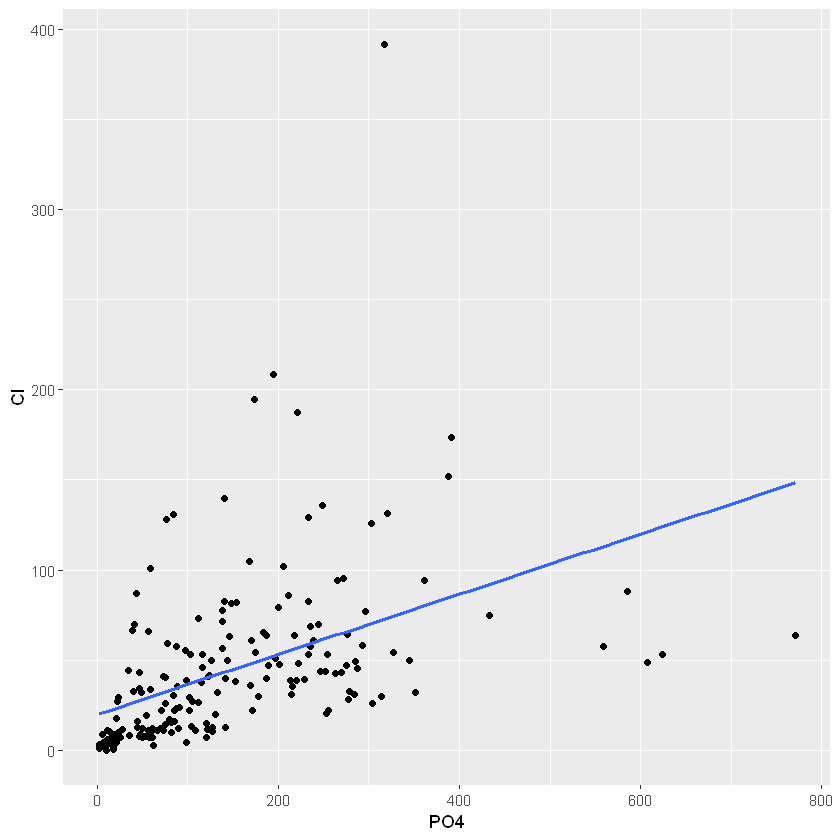

In [130]:
#0.4590139
ggplot(dados)+aes(PO4,Cl)+geom_point()+geom_smooth(method="lm",se=F)

In [131]:
x=lm(dados$Cl ~ dados$PO4, data=dados)
summary(x)


Call:
lm(formula = dados$Cl ~ dados$PO4, data = dados)

Residuals:
   Min     1Q Median     3Q    Max 
-84.47 -19.31 -12.22   8.83 318.80 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 19.86369    4.51893   4.396 1.84e-05 ***
dados$PO4    0.16667    0.02353   7.084 2.72e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 41.72 on 188 degrees of freedom
  (8 observations deleted due to missingness)
Multiple R-squared:  0.2107,	Adjusted R-squared:  0.2065 
F-statistic: 50.18 on 1 and 188 DF,  p-value: 2.725e-11


In [132]:
a=which(is.na(dados$Cl))
dados$Cl[a]=cbind(rep(1,length(a)),dados$PO4[a])%*%t(t(x$coefficients))

In [133]:
apply(dados,2,function(x) sum(is.na(x)))

season   size  speed   mxPH   mnO2     Cl    NO3    NH4   oPO4    PO4   Chla 
     0      0      0      0      1      0      0      0      0      0      0 
    a1     a2     a3     a4     a5     a6     a7 
     0      0      0      0      0      0      0

# Variável mnO2

Warning message:
"Removed 1 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 1 rows containing missing values (geom_point)."

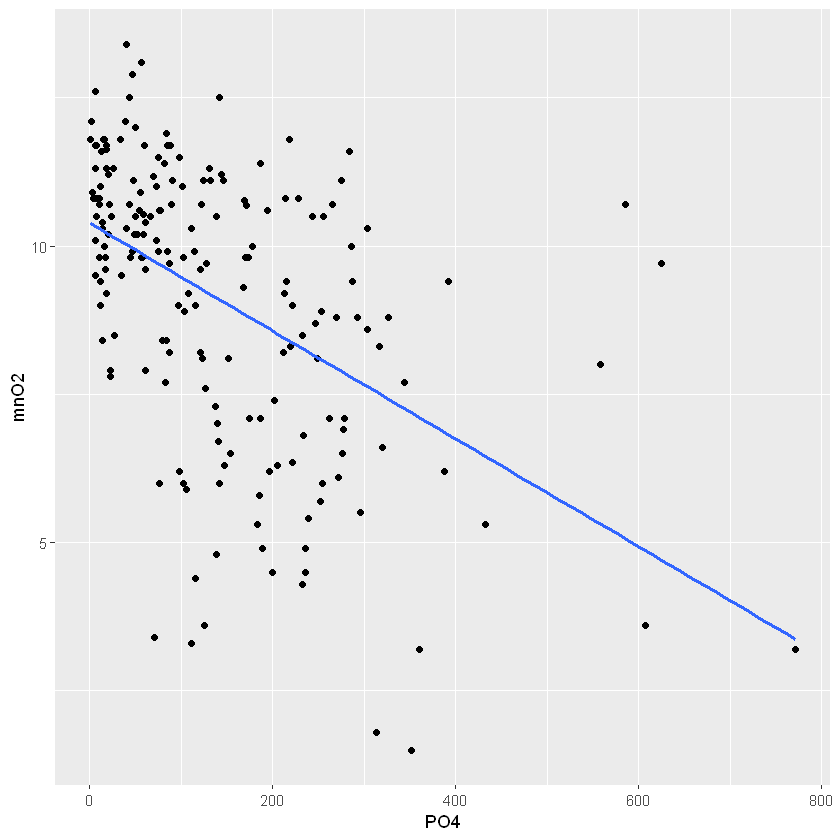

In [134]:
#-0.4889931
ggplot(dados)+aes(PO4,mnO2)+geom_point()+geom_smooth(method="lm",se=F)

In [135]:
x=lm(dados$mnO2 ~ dados$PO4, data=dados)
summary(x)


Call:
lm(formula = dados$mnO2 ~ dados$PO4, data = dados)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3413 -1.1655  0.3462  1.3995  5.6406 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.386779   0.219605  47.297  < 2e-16 ***
dados$PO4   -0.009091   0.001161  -7.828 3.08e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.094 on 195 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.2391,	Adjusted R-squared:  0.2352 
F-statistic: 61.28 on 1 and 195 DF,  p-value: 3.083e-13


In [136]:
a=which(is.na(dados$mnO2))
dados$mnO2[a]=cbind(rep(1,length(a)),dados$PO4[a])%*%t(t(x$coefficients))

In [137]:
apply(dados,2,function(x) sum(is.na(x)))

season   size  speed   mxPH   mnO2     Cl    NO3    NH4   oPO4    PO4   Chla 
     0      0      0      0      0      0      0      0      0      0      0 
    a1     a2     a3     a4     a5     a6     a7 
     0      0      0      0      0      0      0

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

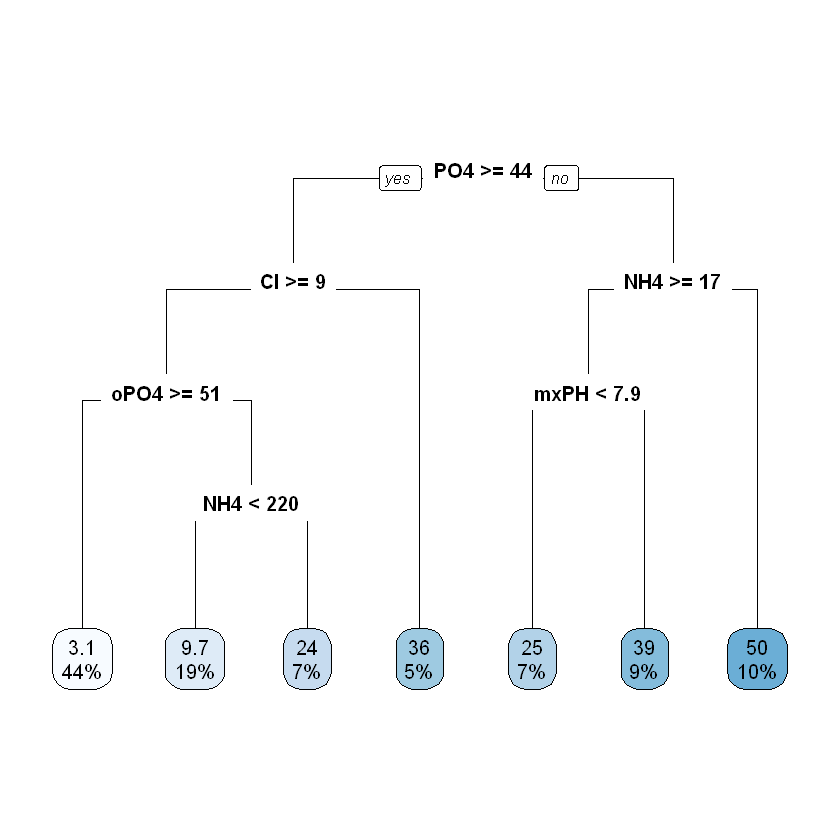

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

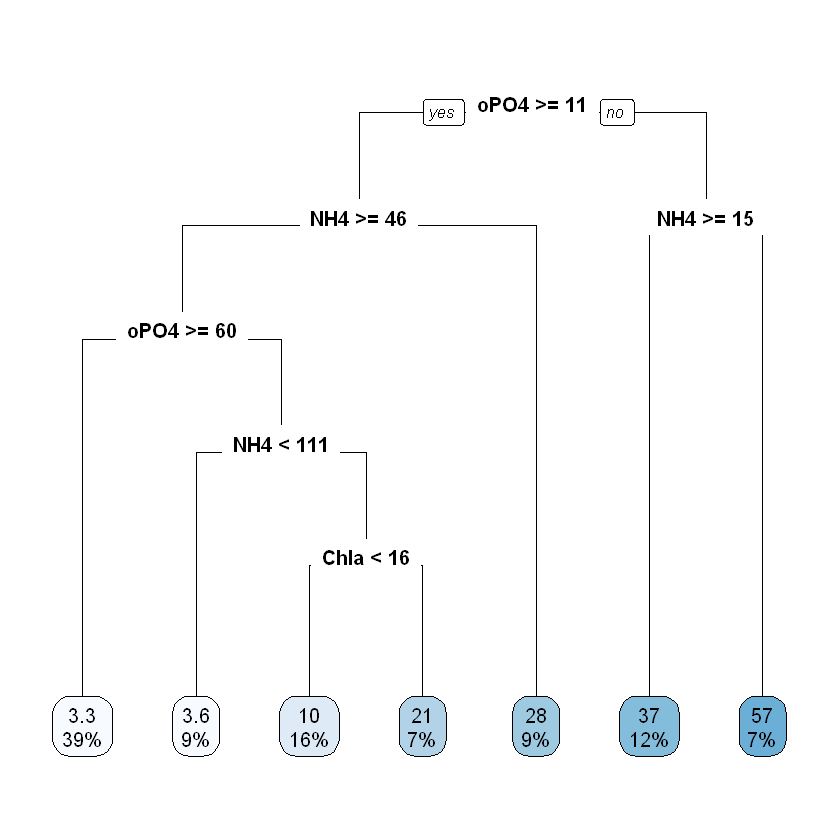

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

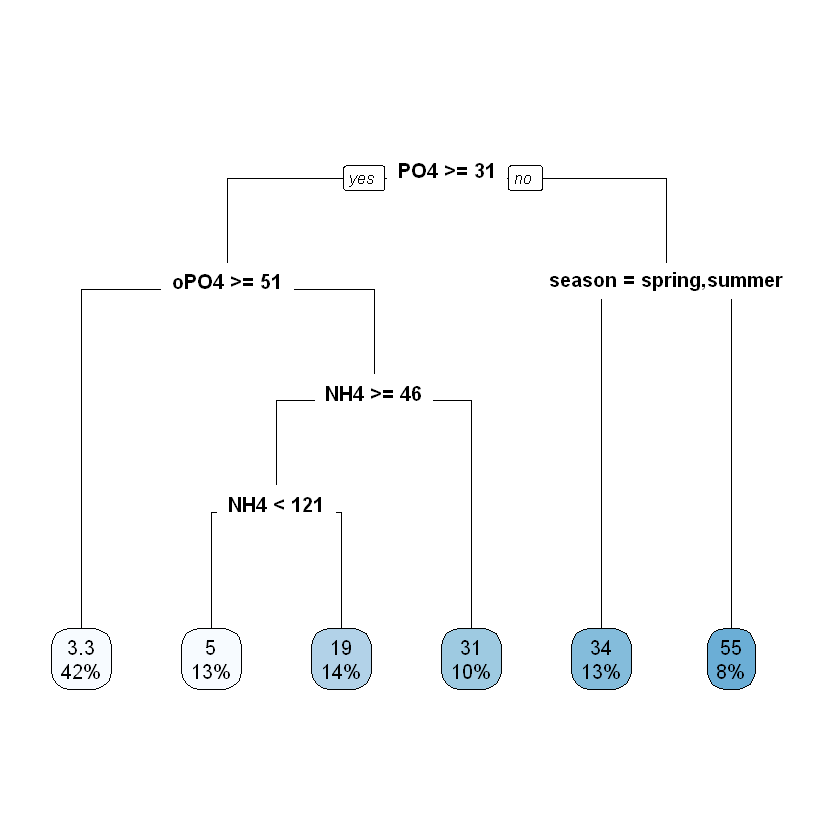

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

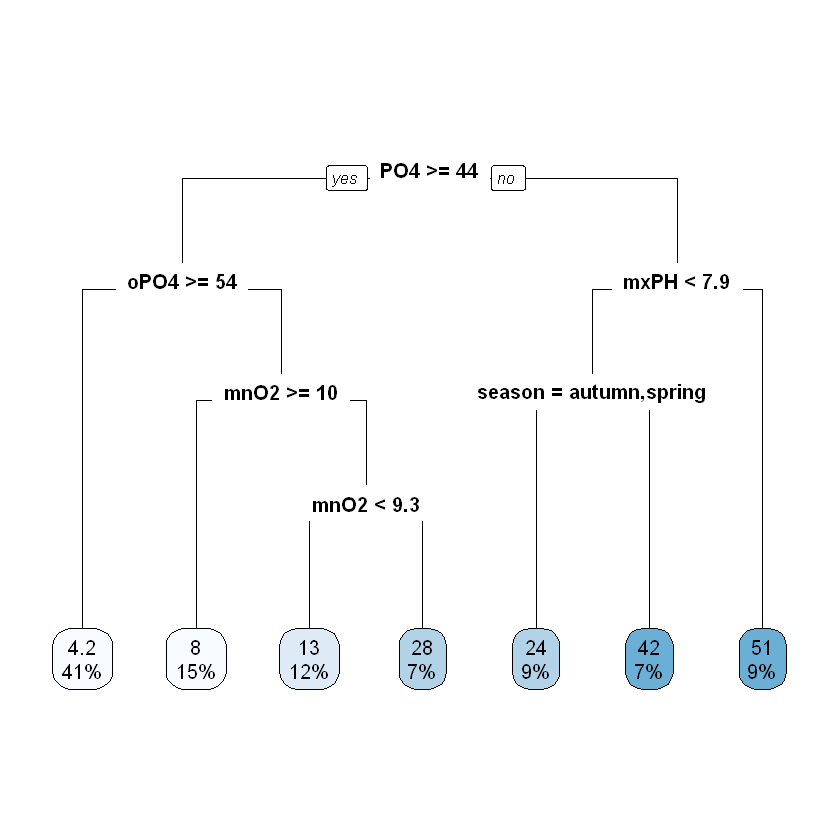

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

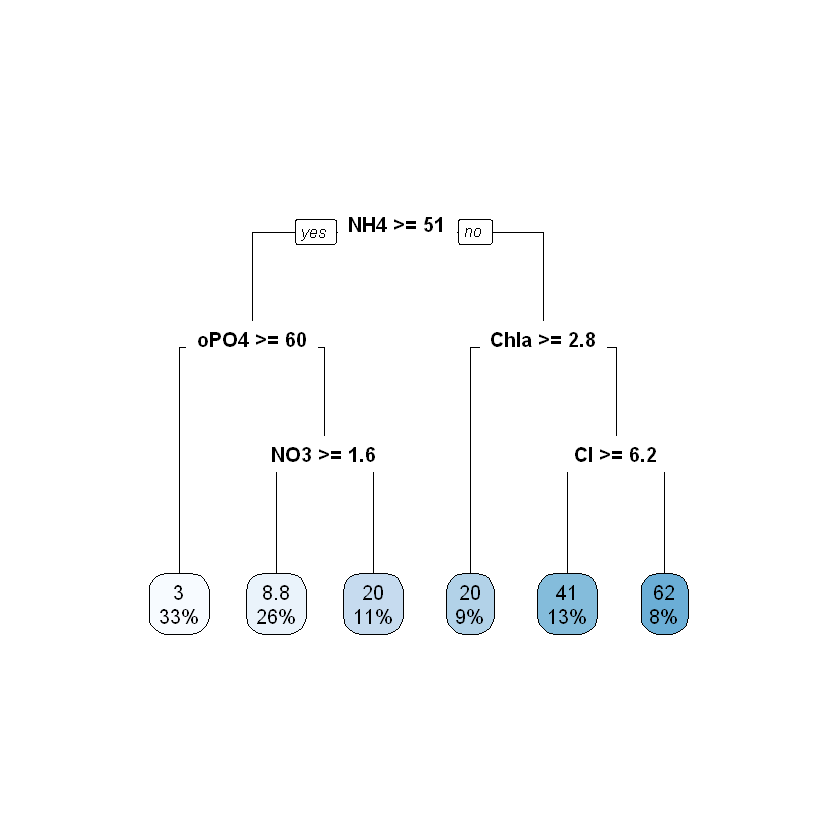

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

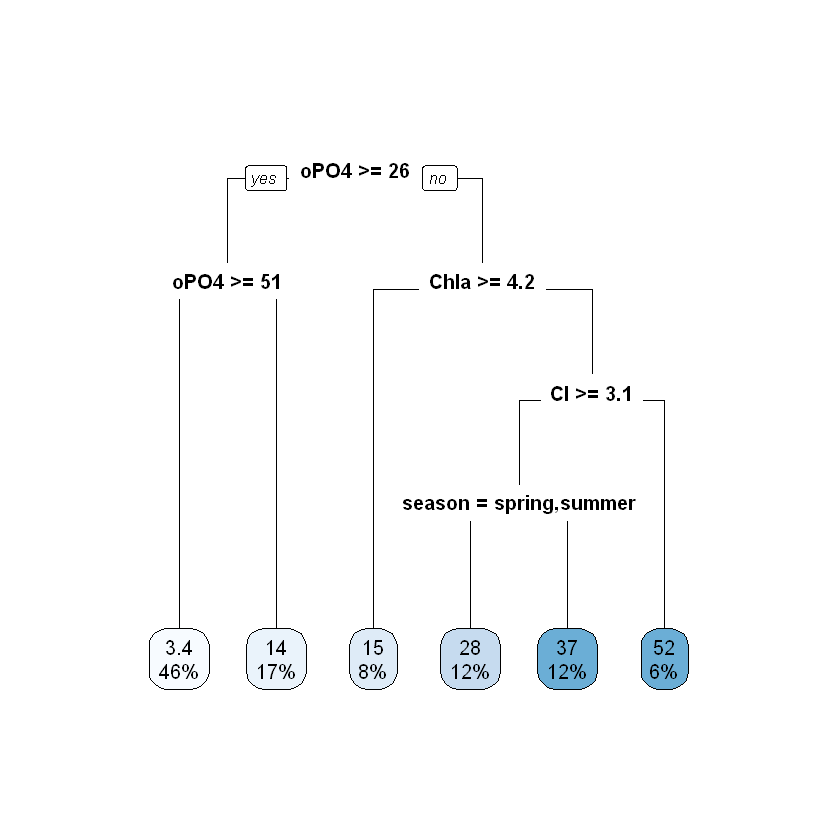

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

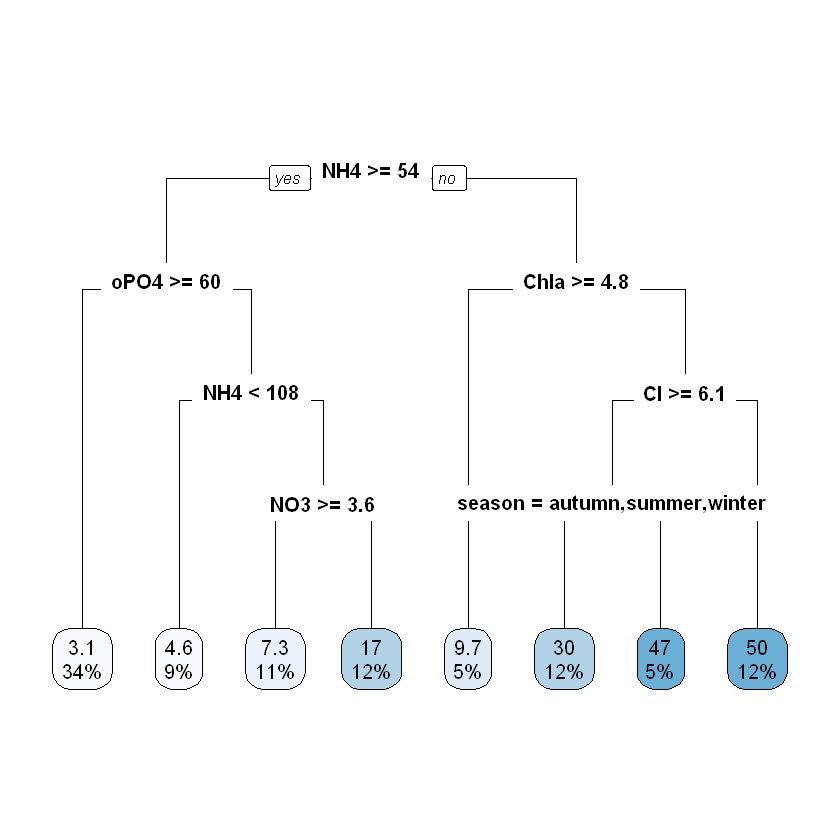

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

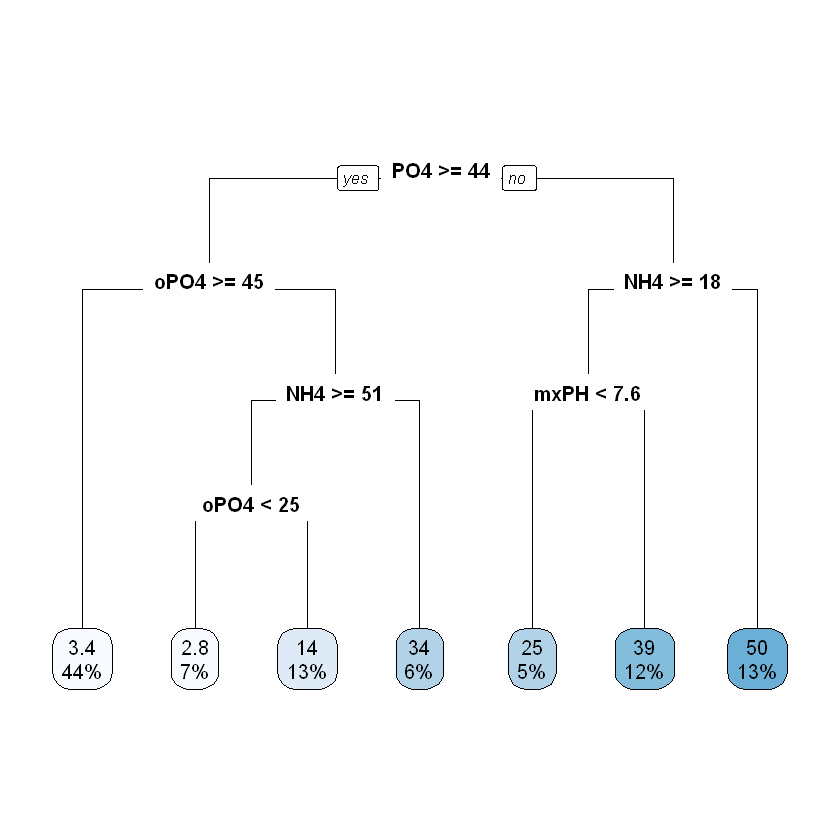

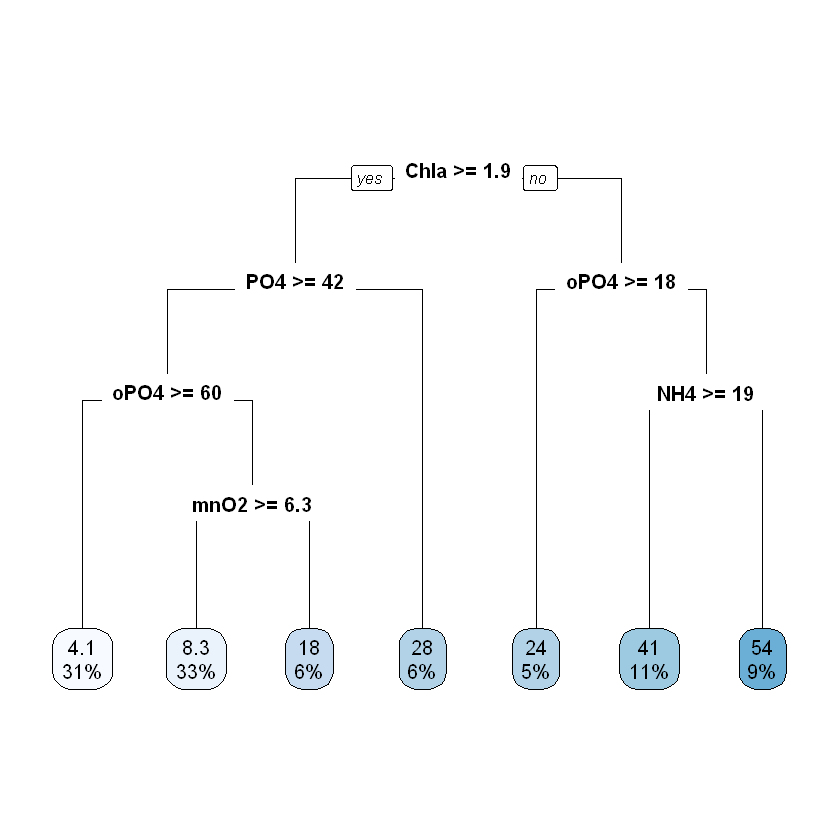

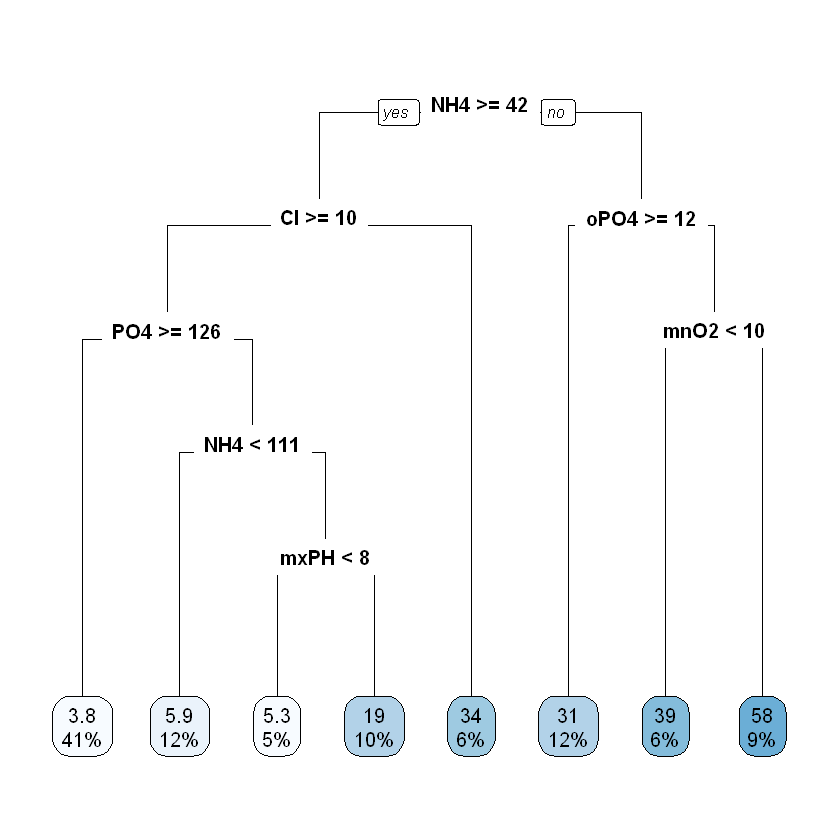

In [138]:
metricas=c()
set.seed(7)
for(i in 1:10){
amostra=S.SI(nrow(dados),floor(nrow(dados)*0.7))
treino=dados[amostra,]
teste=dados[-amostra,]
modelo4=rpart(a1 ~ ., data = treino[, 1:12])
rpart.plot(modelo4, type=0, varlen=10)
##Avaliação da performance do modelo
metricas=append(metricas,mean((teste$a1-predict(modelo4,teste[,1:11]))^2))
}

In [139]:
metricas

[1] 316.7298 333.2860 381.4759 315.4459 458.9700 387.8296 310.7102 198.2645
 [9] 370.8033 364.7194

In [140]:
m4=cbind(mean(metricas),sd(metricas))
m=rbind(m,m4)

# Imputação KNN

In [141]:
dados=AjeitaDados(dados)
apply(dados,2,function(x) sum(is.na(x)))

season   size  speed   mxPH   mnO2     Cl    NO3    NH4   oPO4    PO4   Chla 
     0      0      0      1      1      8      0      0      0      1     10 
    a1     a2     a3     a4     a5     a6     a7 
     0      0      0      0      0      0      0

# 1 Vizinho mais próximo

In [142]:
dados=knnImputation(dados,1,scale=T,meth="median")
apply(dados,2,function(x) sum(is.na(x)))

season   size  speed   mxPH   mnO2     Cl    NO3    NH4   oPO4    PO4   Chla 
     0      0      0      0      0      0      0      0      0      0      0 
    a1     a2     a3     a4     a5     a6     a7 
     0      0      0      0      0      0      0

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

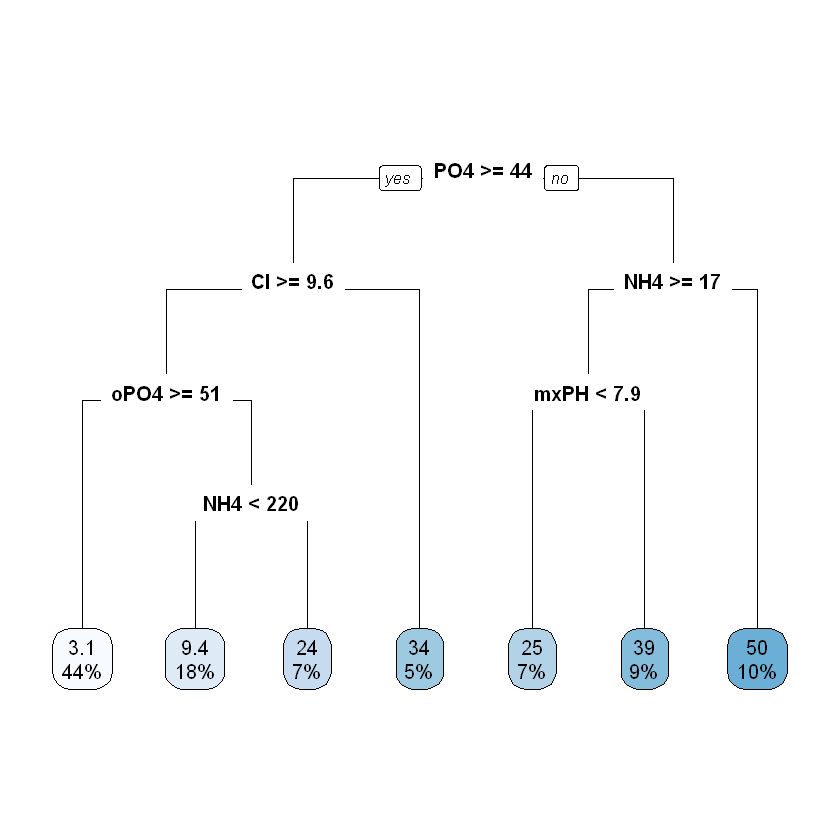

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

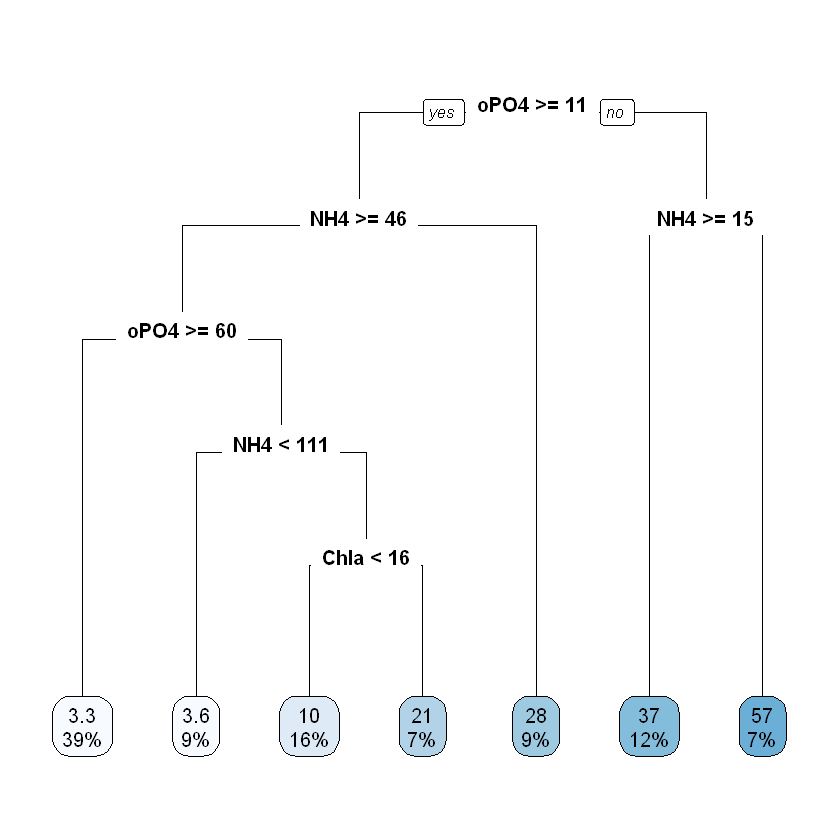

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

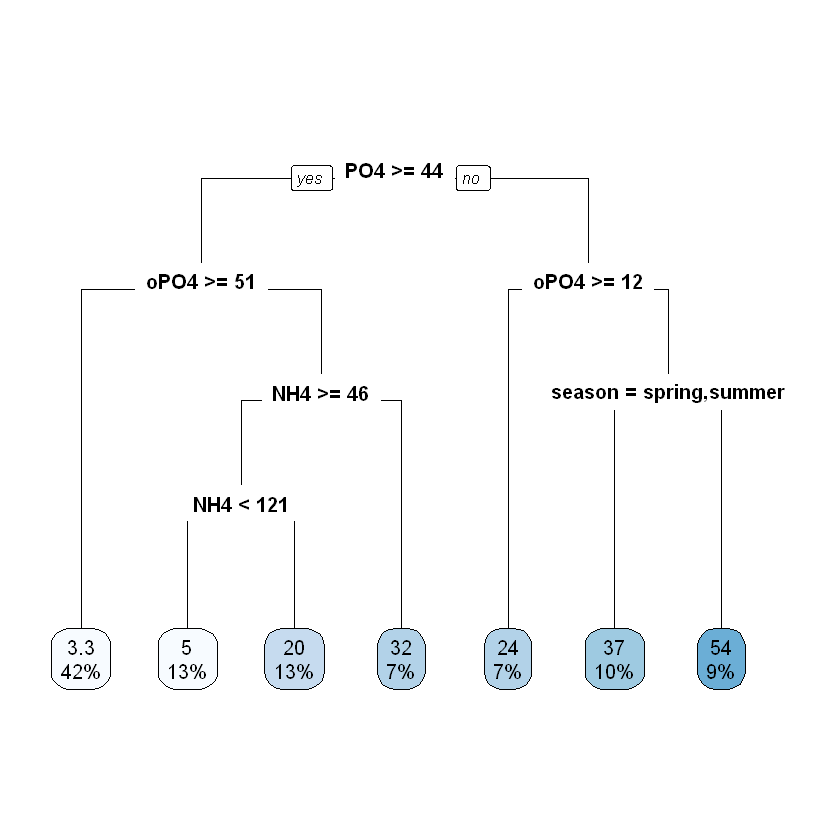

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

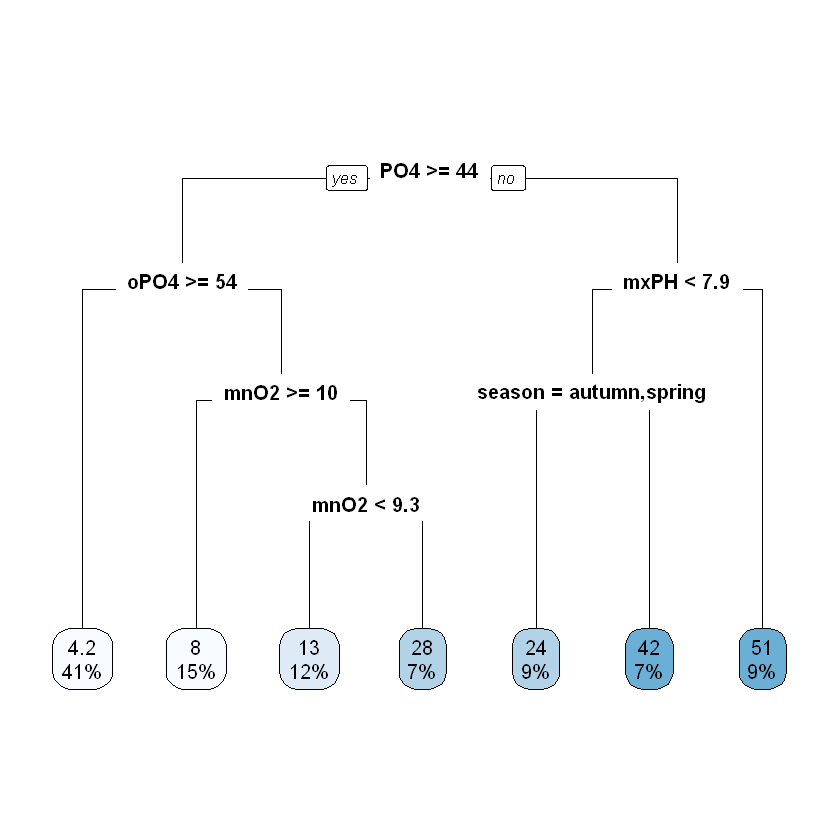

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

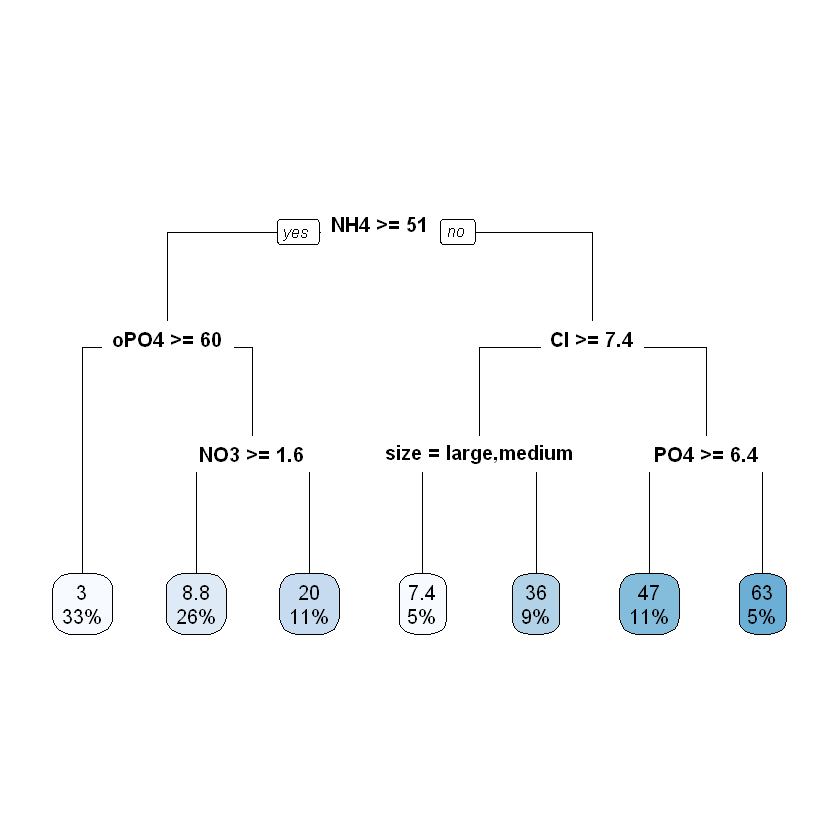

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

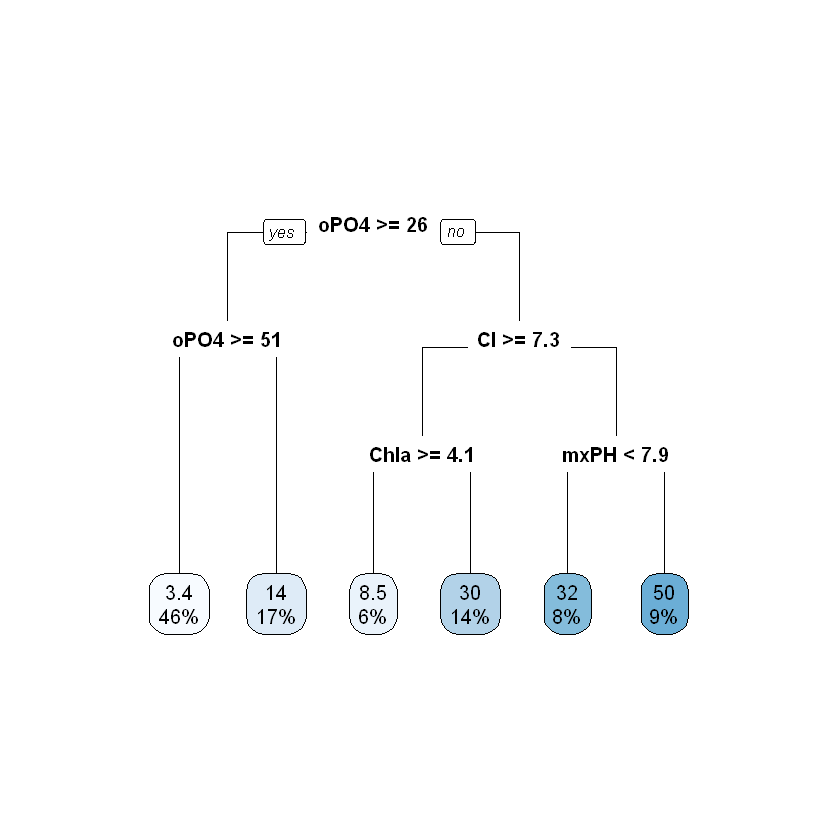

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

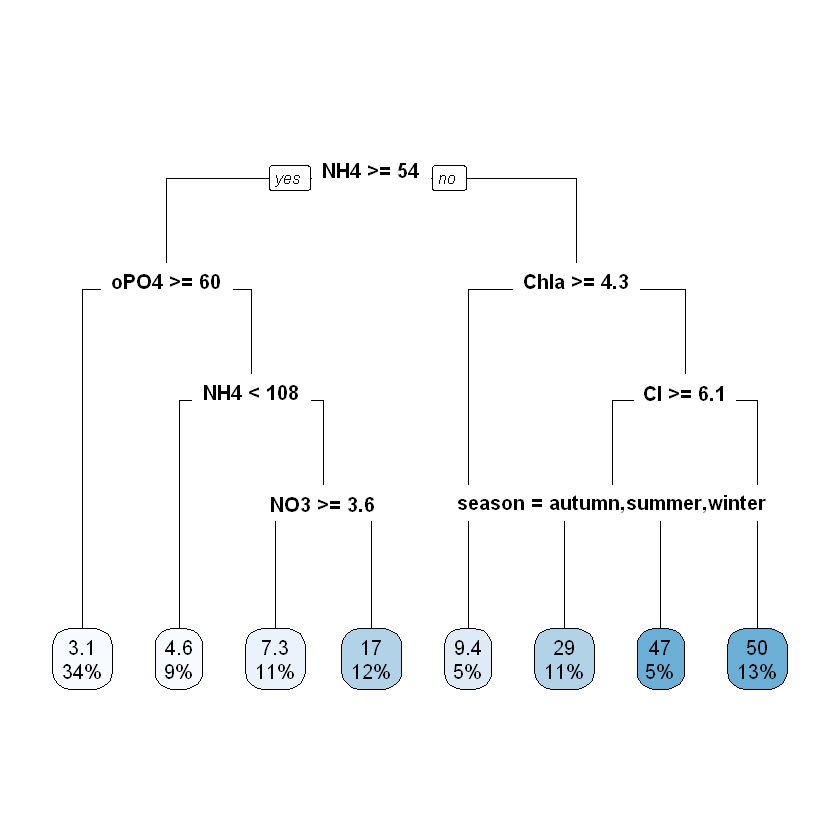

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

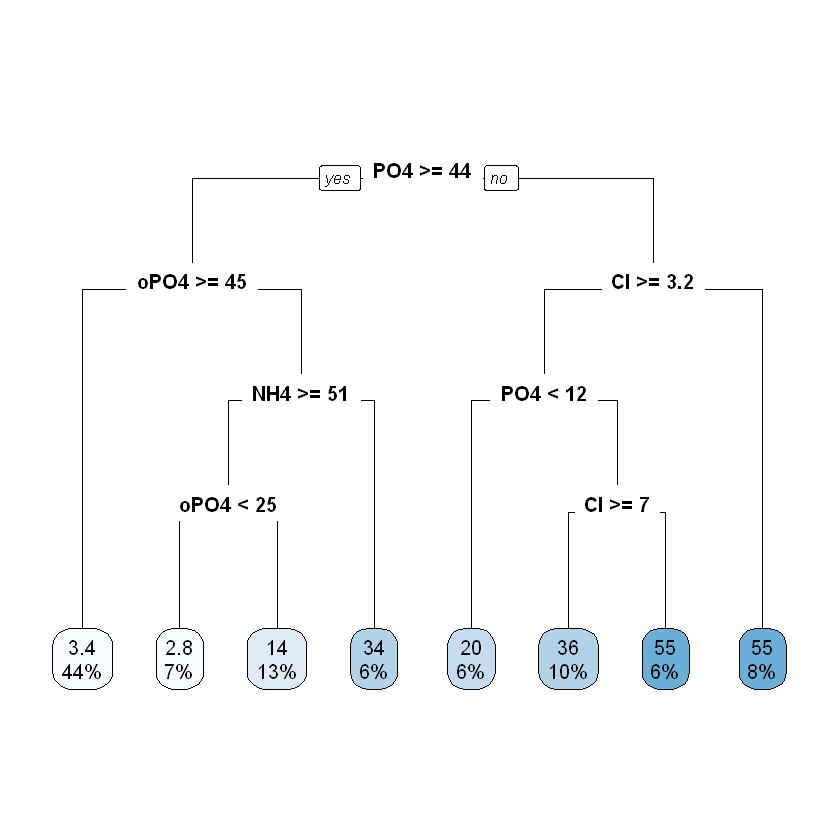

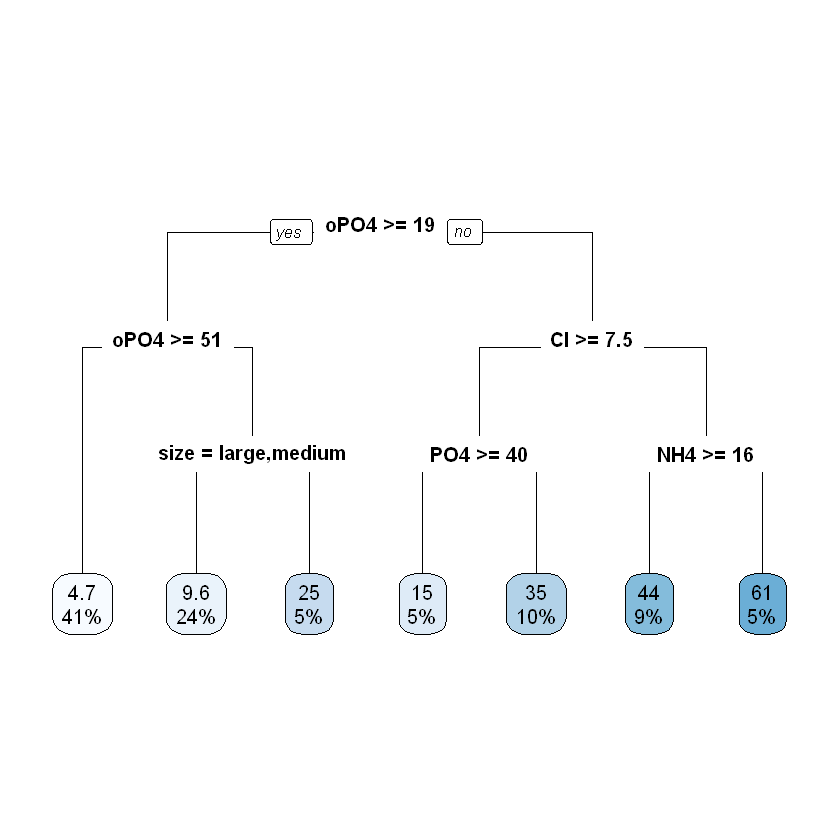

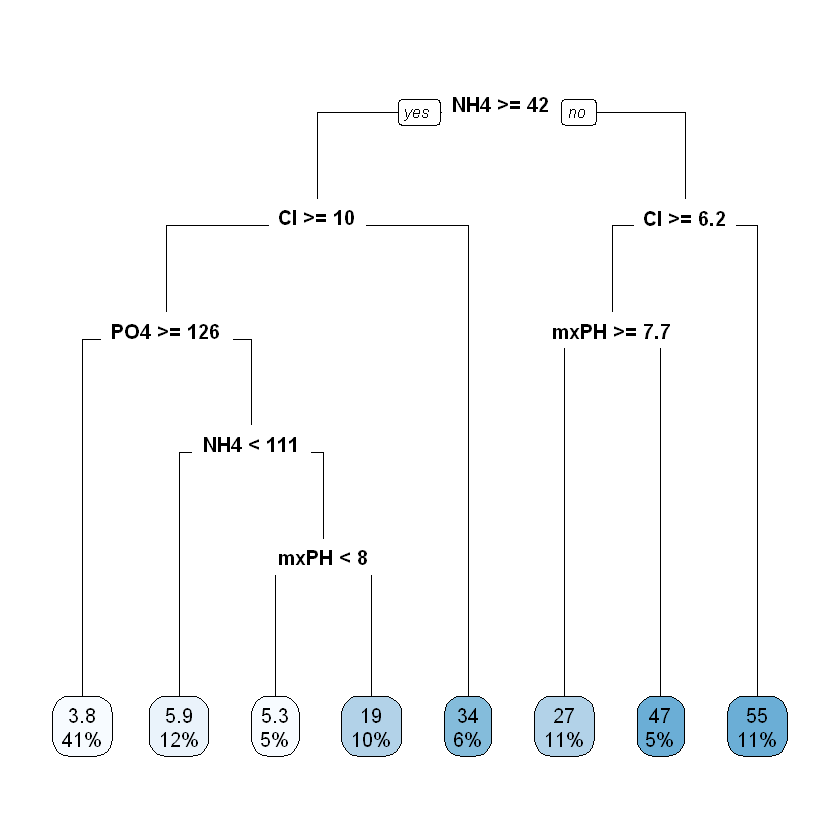

In [143]:
metricas=c()
set.seed(7)
for(i in 1:10){
amostra=S.SI(nrow(dados),floor(nrow(dados)*0.7))
treino=dados[amostra,]
teste=dados[-amostra,]
modelo5=rpart(a1 ~ ., data = treino[, 1:12])
rpart.plot(modelo5, type=0, varlen=10)
##Avaliação do modelo
metricas=append(metricas,mean((teste$a1-predict(modelo5,teste[,1:11]))^2))
}

In [144]:
metricas

[1] 316.4394 333.2860 366.4828 307.7673 321.4530 352.7687 324.8589 217.0901
 [9] 282.2884 350.0577

In [145]:
m5=cbind(mean(metricas),sd(metricas))
m=rbind(m,m5)

# K Vizinhos mais próximos

In [146]:
#Método pela função kernel
set.seed(7)
for (i in 2:10){
  metricas=c()
  dados=AjeitaDados(dados)
  dados=knnImputation(dados,i,scale=T,meth="weighAvg")
  for(j in 1:10){
    amostra=S.SI(nrow(dados),floor(nrow(dados)*0.7))
    treino=dados[amostra,]
    teste=dados[-amostra,]
    modelo=rpart(a1 ~ ., data = treino[, 1:12])
    ##Avaliação do modelo
    metricas=append(metricas,mean((teste$a1-predict(modelo,teste[,1:11]))^2))
    m6=cbind(mean(metricas),sd(metricas))           
                }
    m=rbind(m,m6)
}

In [147]:
#Método pela mediana
set.seed(7)
for (i in 2:10){
  metricas=c()
  dados=AjeitaDados(dados)
  dados=knnImputation(dados,i,scale=T,meth="median")
  for(j in 1:10){
    amostra=S.SI(nrow(dados),floor(nrow(dados)*0.7))
    treino=dados[amostra,]
    teste=dados[-amostra,]
    modelo=rpart(a1 ~ ., data = treino[, 1:12])
    ##Avaliação do modelo
    metricas=append(metricas,mean((teste$a1-predict(modelo,teste[,1:11]))^2))
    m6=cbind(mean(metricas),sd(metricas))           
  }
  m=rbind(m,m6)
}

# IMPUTAÇÃO MULTIPLA

In [148]:
dados=AjeitaDados(dados)
nrow(dados)

[1] 198

,season,size,speed,NO3,NH4,oPO4,a1,a2,a3,a4,a5,a6,a7,mxPH,mnO2,PO4,Cl,Chla,
184,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,2
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1
,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,8,10,21


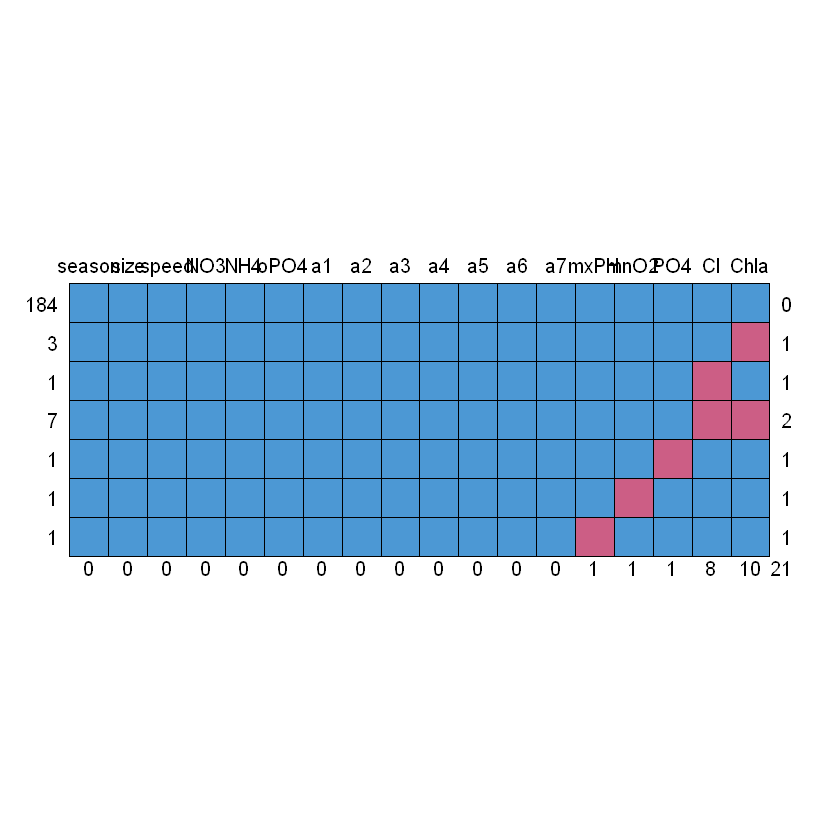

In [149]:
md.pattern(dados)

In [150]:
apply(dados,2,function(x) sum(is.na(x)))

season   size  speed   mxPH   mnO2     Cl    NO3    NH4   oPO4    PO4   Chla 
     0      0      0      1      1      8      0      0      0      1     10 
    a1     a2     a3     a4     a5     a6     a7 
     0      0      0      0      0      0      0

In [151]:
imputacao=mice(dados,m=5,method="pmm",maxit=50)
summary(imputacao)


 iter imp variable
  1   1  mxPH  mnO2  Cl  PO4  Chla
  1   2  mxPH  mnO2  Cl  PO4  Chla
  1   3  mxPH  mnO2  Cl  PO4  Chla
  1   4  mxPH  mnO2  Cl  PO4  Chla
  1   5  mxPH  mnO2  Cl  PO4  Chla
  2   1  mxPH  mnO2  Cl  PO4  Chla
  2   2  mxPH  mnO2  Cl  PO4  Chla
  2   3  mxPH  mnO2  Cl  PO4  Chla
  2   4  mxPH  mnO2  Cl  PO4  Chla
  2   5  mxPH  mnO2  Cl  PO4  Chla
  3   1  mxPH  mnO2  Cl  PO4  Chla
  3   2  mxPH  mnO2  Cl  PO4  Chla
  3   3  mxPH  mnO2  Cl  PO4  Chla
  3   4  mxPH  mnO2  Cl  PO4  Chla
  3   5  mxPH  mnO2  Cl  PO4  Chla
  4   1  mxPH  mnO2  Cl  PO4  Chla
  4   2  mxPH  mnO2  Cl  PO4  Chla
  4   3  mxPH  mnO2  Cl  PO4  Chla
  4   4  mxPH  mnO2  Cl  PO4  Chla
  4   5  mxPH  mnO2  Cl  PO4  Chla
  5   1  mxPH  mnO2  Cl  PO4  Chla
  5   2  mxPH  mnO2  Cl  PO4  Chla
  5   3  mxPH  mnO2  Cl  PO4  Chla
  5   4  mxPH  mnO2  Cl  PO4  Chla
  5   5  mxPH  mnO2  Cl  PO4  Chla
  6   1  mxPH  mnO2  Cl  PO4  Chla
  6   2  mxPH  mnO2  Cl  PO4  Chla
  6   3  mxPH  mnO2  Cl  PO4  Chla


Class: mids
Number of multiple imputations:  5 
Imputation methods:
season   size  speed   mxPH   mnO2     Cl    NO3    NH4   oPO4    PO4   Chla 
    ""     ""     ""  "pmm"  "pmm"  "pmm"     ""     ""     ""  "pmm"  "pmm" 
    a1     a2     a3     a4     a5     a6     a7 
    ""     ""     ""     ""     ""     ""     "" 
PredictorMatrix:
       season size speed mxPH mnO2 Cl NO3 NH4 oPO4 PO4 Chla a1 a2 a3 a4 a5 a6
season      0    1     1    1    1  1   1   1    1   1    1  1  1  1  1  1  1
size        1    0     1    1    1  1   1   1    1   1    1  1  1  1  1  1  1
speed       1    1     0    1    1  1   1   1    1   1    1  1  1  1  1  1  1
mxPH        1    1     1    0    1  1   1   1    1   1    1  1  1  1  1  1  1
mnO2        1    1     1    1    0  1   1   1    1   1    1  1  1  1  1  1  1
Cl          1    1     1    1    1  0   1   1    1   1    1  1  1  1  1  1  1
       a7
season  1
size    1
speed   1
mxPH    1
mnO2    1
Cl      1


In [152]:
##Valores imputados por banco de dados
imputacao$imp[c(4,5,6,10,11)]

,1,2,3,4,5
48,7.9,8.3,8.4,8.3,8.15
,1,2,3,4,5
38,11.4,11.7,11.17,9,9.8
,1,2,3,4,5
55,5.326,10.207,4.700,0.800,7.000
56,11.088,43.090,7.000,10.500,6.167
57,65.750,30.523,32.300,82.852,0.222
58,12.182,43.000,37.600,31.091,2.200
59,34.500,7.000,0.800,26.000,8.690
60,2.111,3.860,26.000,65.750,1.450


In [153]:
# Banco de dados específico
head(complete(imputacao,4))

season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
winter,small,medium,8.00,9.8,60.800,6.238,578.000,105.000,170.000,50.0,0.0,0.0,0.0,0.0,34.2,8.3,0.0
spring,small,medium,8.35,8.0,57.750,1.288,370.000,428.750,558.750,1.3,1.4,7.6,4.8,1.9,6.7,0.0,2.1
autumn,small,medium,8.10,11.4,40.020,5.330,346.667,125.667,187.057,15.6,3.3,53.6,1.9,0.0,0.0,0.0,9.7
spring,small,medium,8.07,4.8,77.364,2.302,98.182,61.182,138.700,1.4,3.1,41.0,18.9,0.0,1.4,0.0,1.4
autumn,small,medium,8.06,9.0,55.350,10.416,233.700,58.222,97.580,10.5,9.2,2.9,7.5,0.0,7.5,4.1,1.0
winter,small,high,8.25,13.1,65.750,9.248,430.000,18.250,56.667,28.4,15.1,14.6,1.4,0.0,22.5,12.6,2.9


In [154]:
metricas2=c()
set.seed(7)
for(j in 1:10){
amostra=S.SI(nrow(dados),floor(nrow(dados)*0.7))
treino=dados[amostra,]
teste=dados[-amostra,]
metricas=c()
for (i in 1:5){
  dados=complete(imputacao,i)
  modelo=rpart(a1 ~ ., data = treino[, 1:12])
  ##Avaliação do modelo
  t=mean((teste$a1-predict(modelo,teste[,1:11]))^2)
  metricas=append(metricas,t)
              }
metricas2=append(metricas2,mean(metricas))
            }
metricas2
m7=cbind(mean(metricas2),sd(metricas2))
m=rbind(m,m7)


[1] 316.4394 249.6084 491.9660 321.2292 422.3240 348.9540 327.0845 340.0094
 [9] 270.3981 407.6036

In [155]:
m

328.2162,60.82748
291.3044,74.27378
344.7819,81.65945
343.8235,68.07822
317.2492,42.73873
332.6258,52.19857
282.3917,70.59342
308.3530,88.33998
336.2694,48.20768
349.5436,51.39956
349.9557,51.56562


In [156]:
(rownames(m)=c("rpart","Tirando linhas","Medidas de Tendência","Regressão Linear",
               "1 vizinho","2 vizinhos/Kernel","3 vizinhos/Kernel","4 vizinhos/Kernel","5 vizinhos/Kernel",
               "6 vizinhos/Kernel","7 vizinhos/Kernel","8 vizinhos/Kernel","9 vizinhos/Kernel"
               ,"10 vizinhos/Kernel","2 vizinhos/Mediana","3 vizinhos/Mediana","4 vizinhos/Mediana"
               ,"5 vizinhos/Mediana","6 vizinhos/Mediana","7 vizinhos/Mediana","8 vizinhos/Mediana"
               ,"9 vizinhos/Mediana","10 vizinhos/Mediana","I.M")) 
colnames(m)=c("Média da Performance","Desvio-Padrão da Performance")


[1] "rpart"                "Tirando linhas"       "Medidas de Tendência"
 [4] "Regressão Linear"     "1 vizinho"            "2 vizinhos/Kernel"   
 [7] "3 vizinhos/Kernel"    "4 vizinhos/Kernel"    "5 vizinhos/Kernel"   
[10] "6 vizinhos/Kernel"    "7 vizinhos/Kernel"    "8 vizinhos/Kernel"   
[13] "9 vizinhos/Kernel"    "10 vizinhos/Kernel"   "2 vizinhos/Mediana"  
[16] "3 vizinhos/Mediana"   "4 vizinhos/Mediana"   "5 vizinhos/Mediana"  
[19] "6 vizinhos/Mediana"   "7 vizinhos/Mediana"   "8 vizinhos/Mediana"  
[22] "9 vizinhos/Mediana"   "10 vizinhos/Mediana"  "I.M"

In [158]:
m[sort(m[,1],index.return=T)$ix,]

,Média da Performance,Desvio-Padrão da Performance
3 vizinhos/Mediana,253.5437,70.73882
3 vizinhos/Kernel,282.3917,70.59342
Tirando linhas,291.3044,74.27378
10 vizinhos/Mediana,291.6939,52.62960
4 vizinhos/Mediana,294.4602,73.13890
10 vizinhos/Kernel,299.4876,62.55118
4 vizinhos/Kernel,308.3530,88.33998
1 vizinho,317.2492,42.73873
7 vizinhos/Mediana,319.3357,52.59573
8 vizinhos/Mediana,323.6224,89.80934
